In [1]:
# Importing Libraries

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
!pip install yellowbrick
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error as mse # library for Mean squared error regression loss.
from sklearn import metrics #accuracy score,MAE,MSE,RMSQE
from sklearn.metrics import mean_squared_error, r2_score
from yellowbrick.regressor import prediction_error # Visualize the prediction error
from yellowbrick.regressor import residuals_plot # Visualize the residuals between predicted and actual data 
from yellowbrick.model_selection import LearningCurve # Visualize Learning Curve
from sklearn.metrics import accuracy_score

In [2]:
# Reading the data set
pizza_info = pd.read_csv('pizza.csv')
pizza_info

,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,A,"Rp235,000",22 inch,chicken,double_signature,jumbo,yes,yes,no
1,A,"Rp198,000",20 inch,papperoni,double_signature,jumbo,yes,yes,no
2,A,"Rp120,000",16 inch,mushrooms,double_signature,reguler,yes,yes,yes
3,A,"Rp155,000",14 inch,smoked_beef,double_signature,reguler,yes,no,yes
4,A,"Rp248,000",18 inch,mozzarella,double_signature,jumbo,yes,no,yes
...,...,...,...,...,...,...,...,...,...
124,E,"Rp39,000",8.5 inch,tuna,spicy tuna,small,yes,yes,yes
125,E,"Rp72,000",12 inch,tuna,spicy tuna,medium,yes,yes,yes
126,E,"Rp99,000",14 inch,tuna,spicy tuna,large,yes,yes,yes
127,E,"Rp44,000",8.5 inch,meat,BBQ_meat_fiesta,small,yes,no,yes


In [3]:
# Finding the number of rows and columns present in the dataset
pizza_info.shape

(129, 9)

In [4]:
# To display first five rows
pizza_info.head()

,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,A,"Rp235,000",22 inch,chicken,double_signature,jumbo,yes,yes,no
1,A,"Rp198,000",20 inch,papperoni,double_signature,jumbo,yes,yes,no
2,A,"Rp120,000",16 inch,mushrooms,double_signature,reguler,yes,yes,yes
3,A,"Rp155,000",14 inch,smoked_beef,double_signature,reguler,yes,no,yes
4,A,"Rp248,000",18 inch,mozzarella,double_signature,jumbo,yes,no,yes


In [5]:
# To display last five rows
pizza_info.tail()

,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
124,E,"Rp39,000",8.5 inch,tuna,spicy tuna,small,yes,yes,yes
125,E,"Rp72,000",12 inch,tuna,spicy tuna,medium,yes,yes,yes
126,E,"Rp99,000",14 inch,tuna,spicy tuna,large,yes,yes,yes
127,E,"Rp44,000",8.5 inch,meat,BBQ_meat_fiesta,small,yes,no,yes
128,E,"Rp78,000",12 inch,meat,BBQ_meat_fiesta,medium,no,no,yes


In [6]:
# To know the data types of each column.
pizza_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   company          129 non-null    object
 1   price            129 non-null    object
 2   diameter         129 non-null    object
 3   topping          129 non-null    object
 4   variant          129 non-null    object
 5   size             129 non-null    object
 6   extra_sauce      129 non-null    object
 7   extra_cheese     129 non-null    object
 8   extra_mushrooms  129 non-null    object
dtypes: object(9)
memory usage: 9.2+ KB


In [7]:
# To check if there are any null values.
pizza_info.isnull().sum()

company            0
price              0
diameter           0
topping            0
variant            0
size               0
extra_sauce        0
extra_cheese       0
extra_mushrooms    0
dtype: int64

In [8]:
# To get count of duplicate rows.
len(pizza_info[pizza_info.duplicated()])

2

In [9]:
# To display the duplicate rows if there are any
# pizza_info[pizza_info.duplicated()]
# pizza_info.drop_duplicates(inplace = True)
# pizza_info.shape

In [10]:
# To display number of unique values present for each column
pizza_info.nunique()

company             5
price              43
diameter           12
topping            12
variant            20
size                6
extra_sauce         2
extra_cheese        2
extra_mushrooms     2
dtype: int64

In [11]:
# #  Renaming the price_rupaiah column.
# pizza_info.rename(columns = {'price_rupiah':'price'}, inplace = True)
# pizza_info

In [12]:
# Replacting 'Rp','inch' using regular expressions and converting the date type to int & float.
pizza_info['price'] = pizza_info.price.str.extract(r'(\d+[.\d]*)').astype(int)
pizza_info['diameter'] = pizza_info.diameter.str.extract(r'(\d+[.\d]*)').astype(float)
pizza_info

,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
0,A,235,22.0,chicken,double_signature,jumbo,yes,yes,no
1,A,198,20.0,papperoni,double_signature,jumbo,yes,yes,no
2,A,120,16.0,mushrooms,double_signature,reguler,yes,yes,yes
3,A,155,14.0,smoked_beef,double_signature,reguler,yes,no,yes
4,A,248,18.0,mozzarella,double_signature,jumbo,yes,no,yes
...,...,...,...,...,...,...,...,...,...
124,E,39,8.5,tuna,spicy tuna,small,yes,yes,yes
125,E,72,12.0,tuna,spicy tuna,medium,yes,yes,yes
126,E,99,14.0,tuna,spicy tuna,large,yes,yes,yes
127,E,44,8.5,meat,BBQ_meat_fiesta,small,yes,no,yes


Exploratory Data Analaysis:

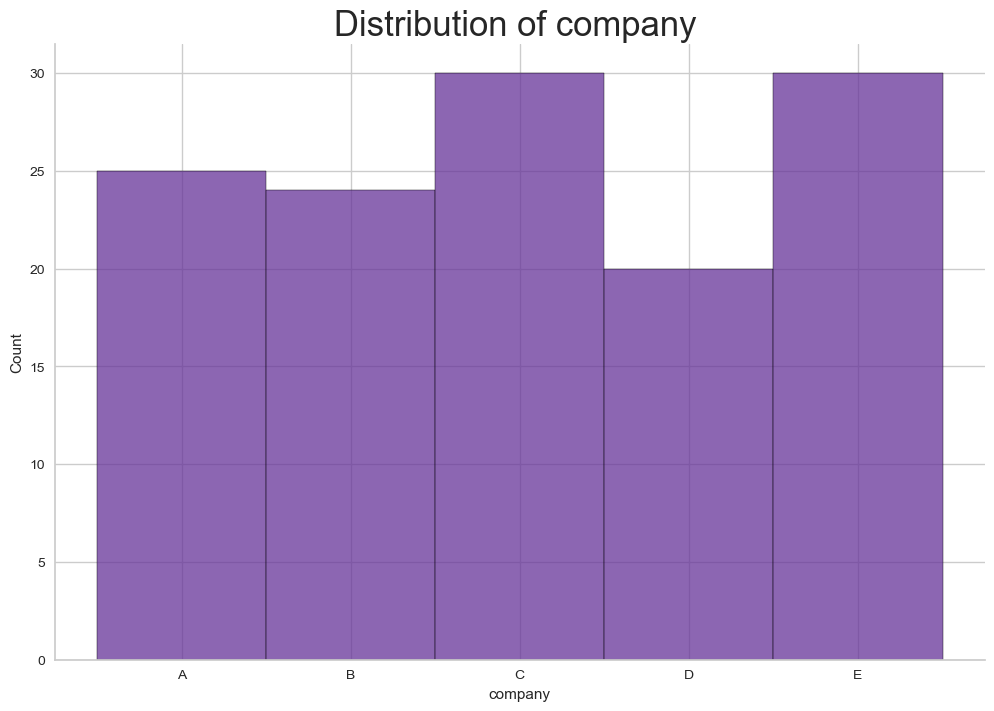

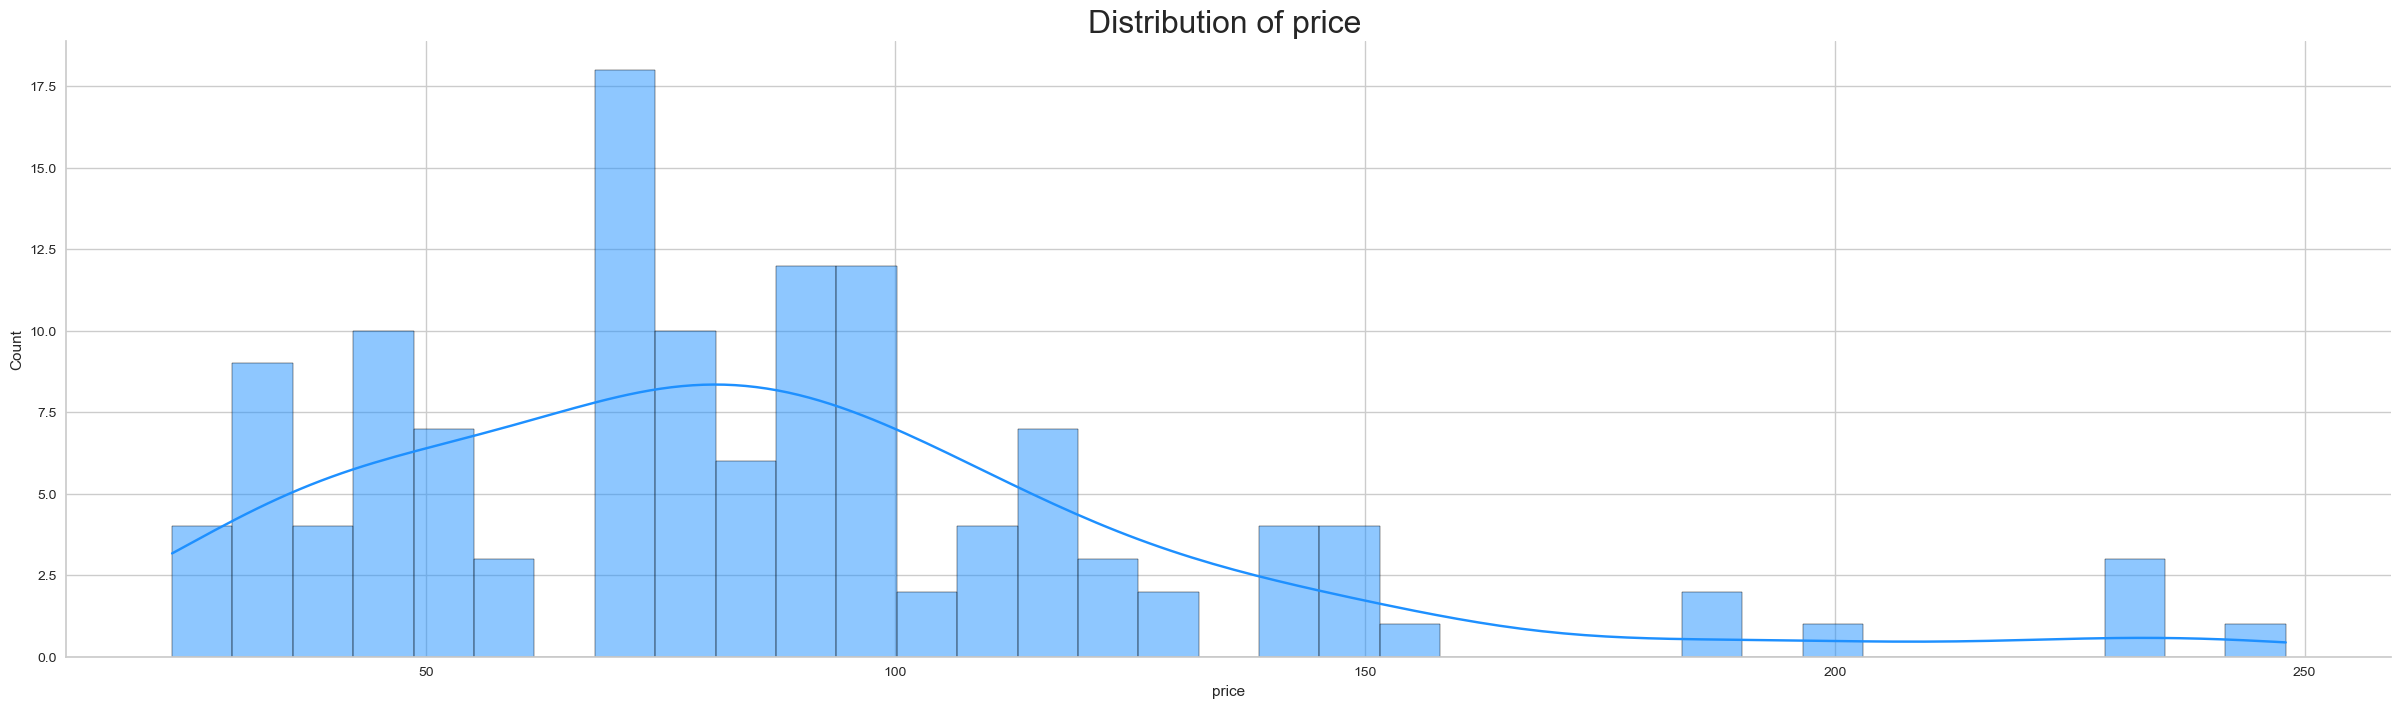

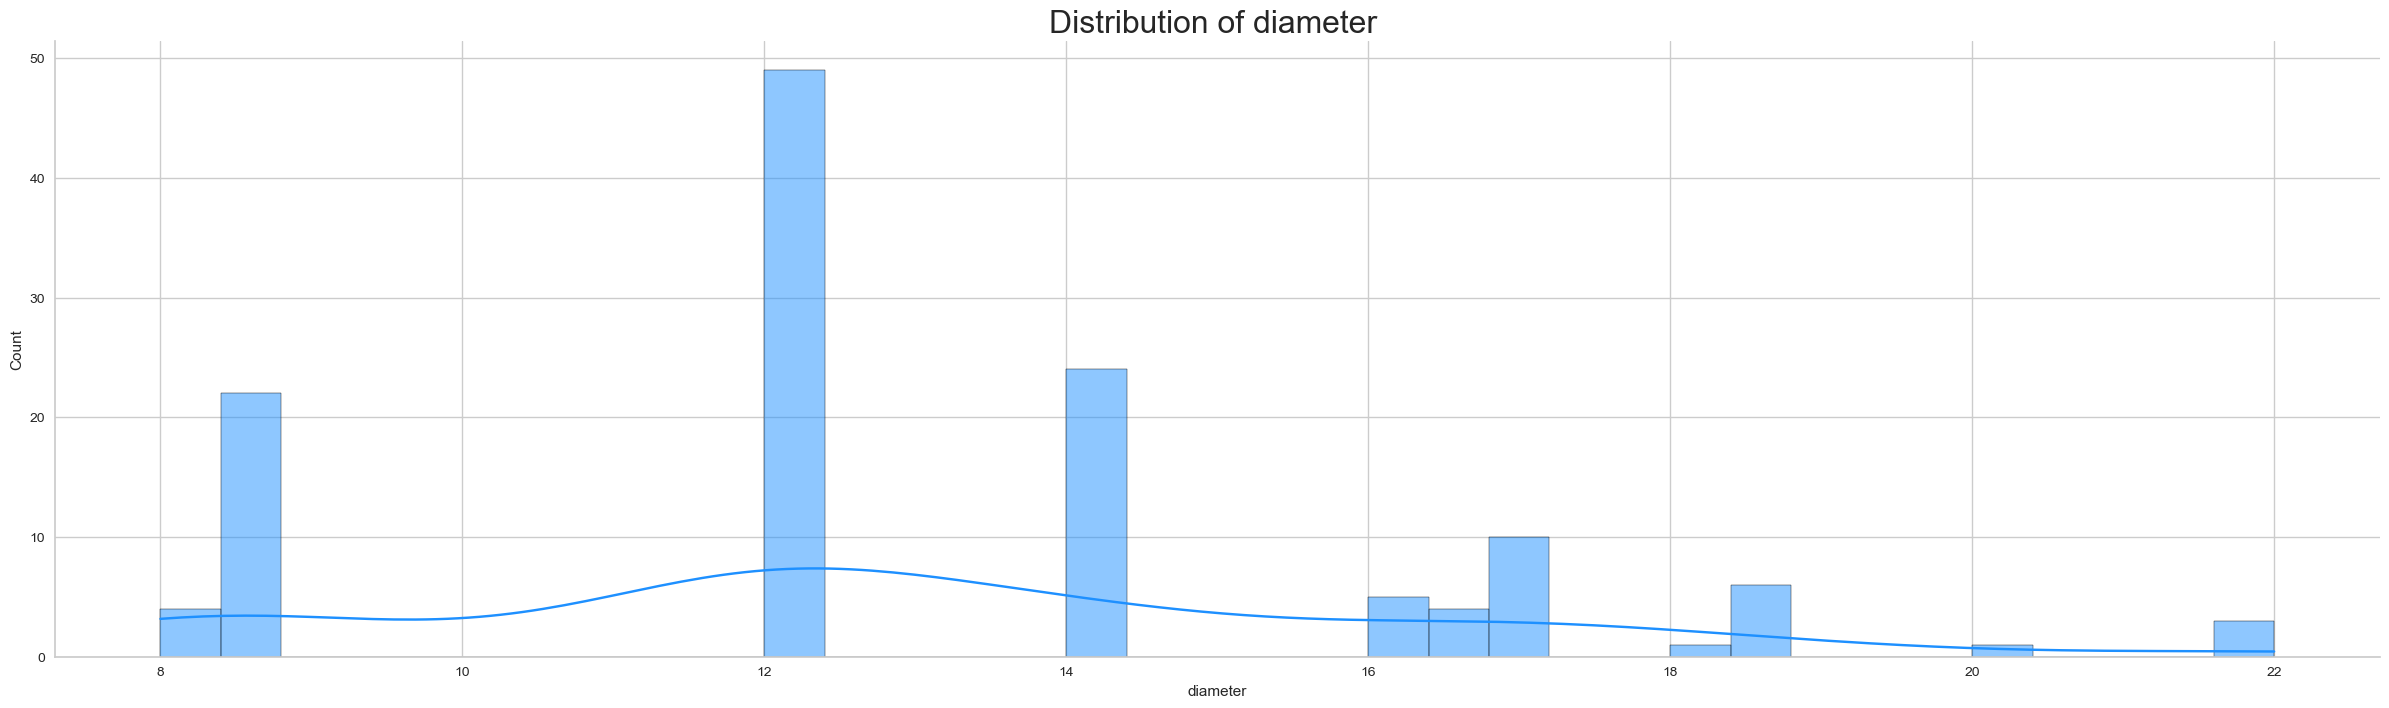

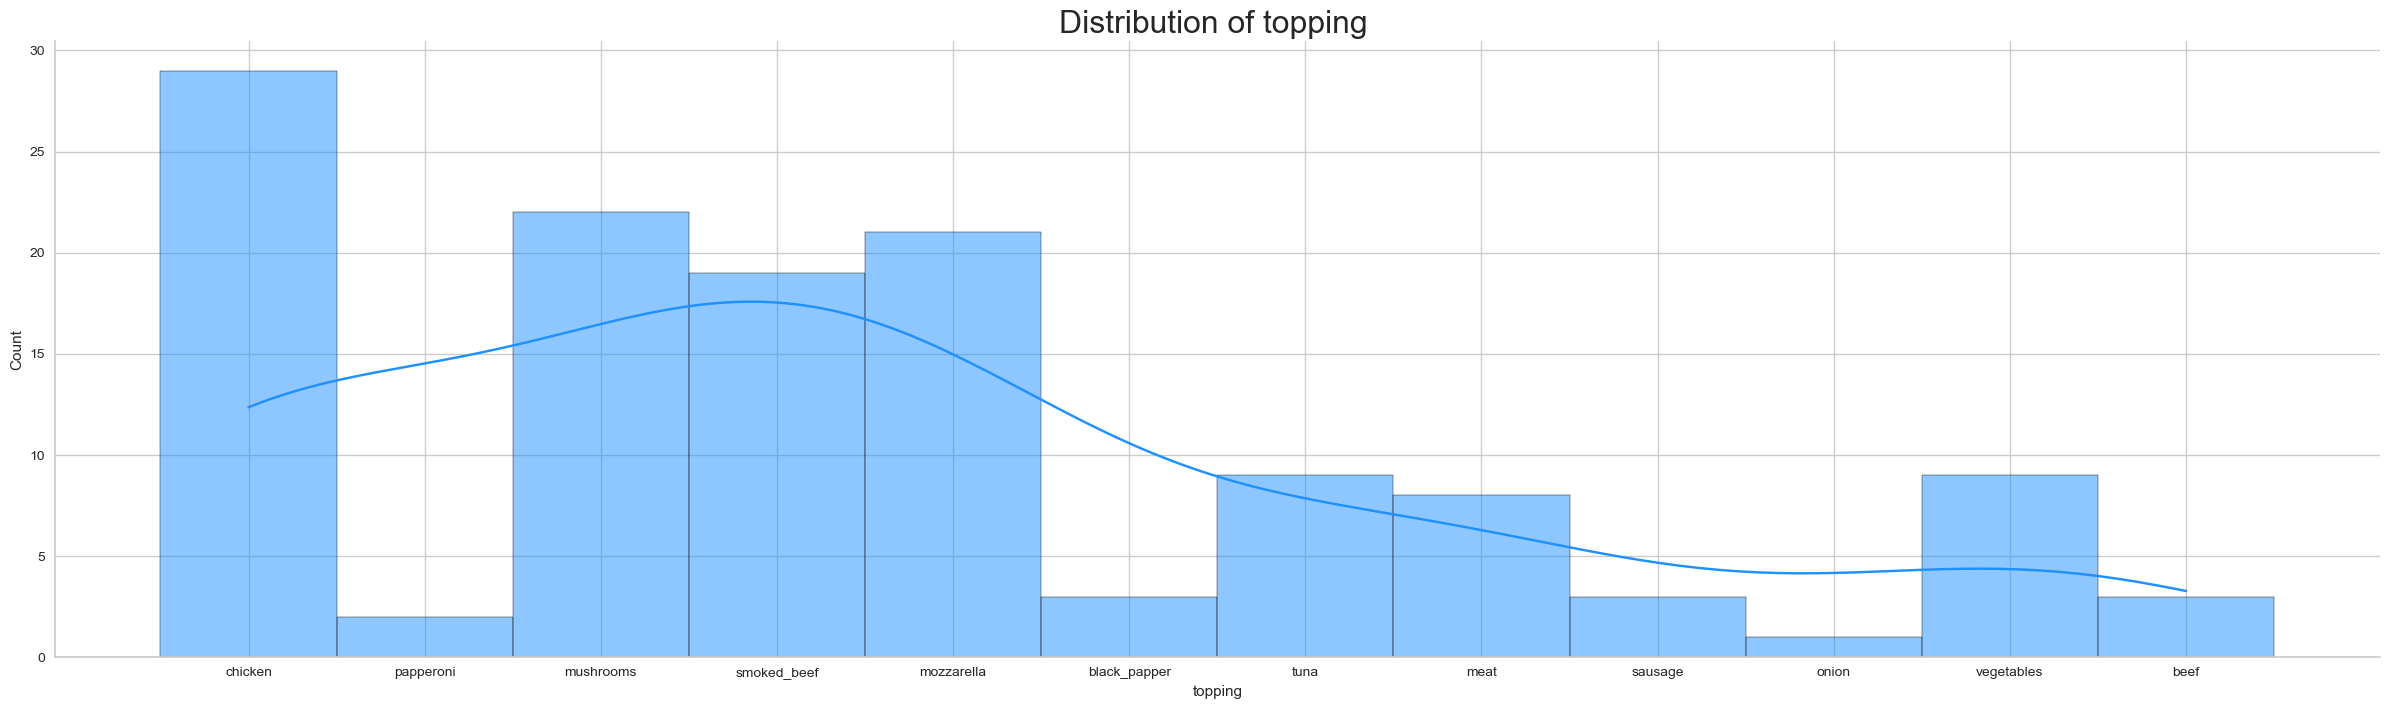

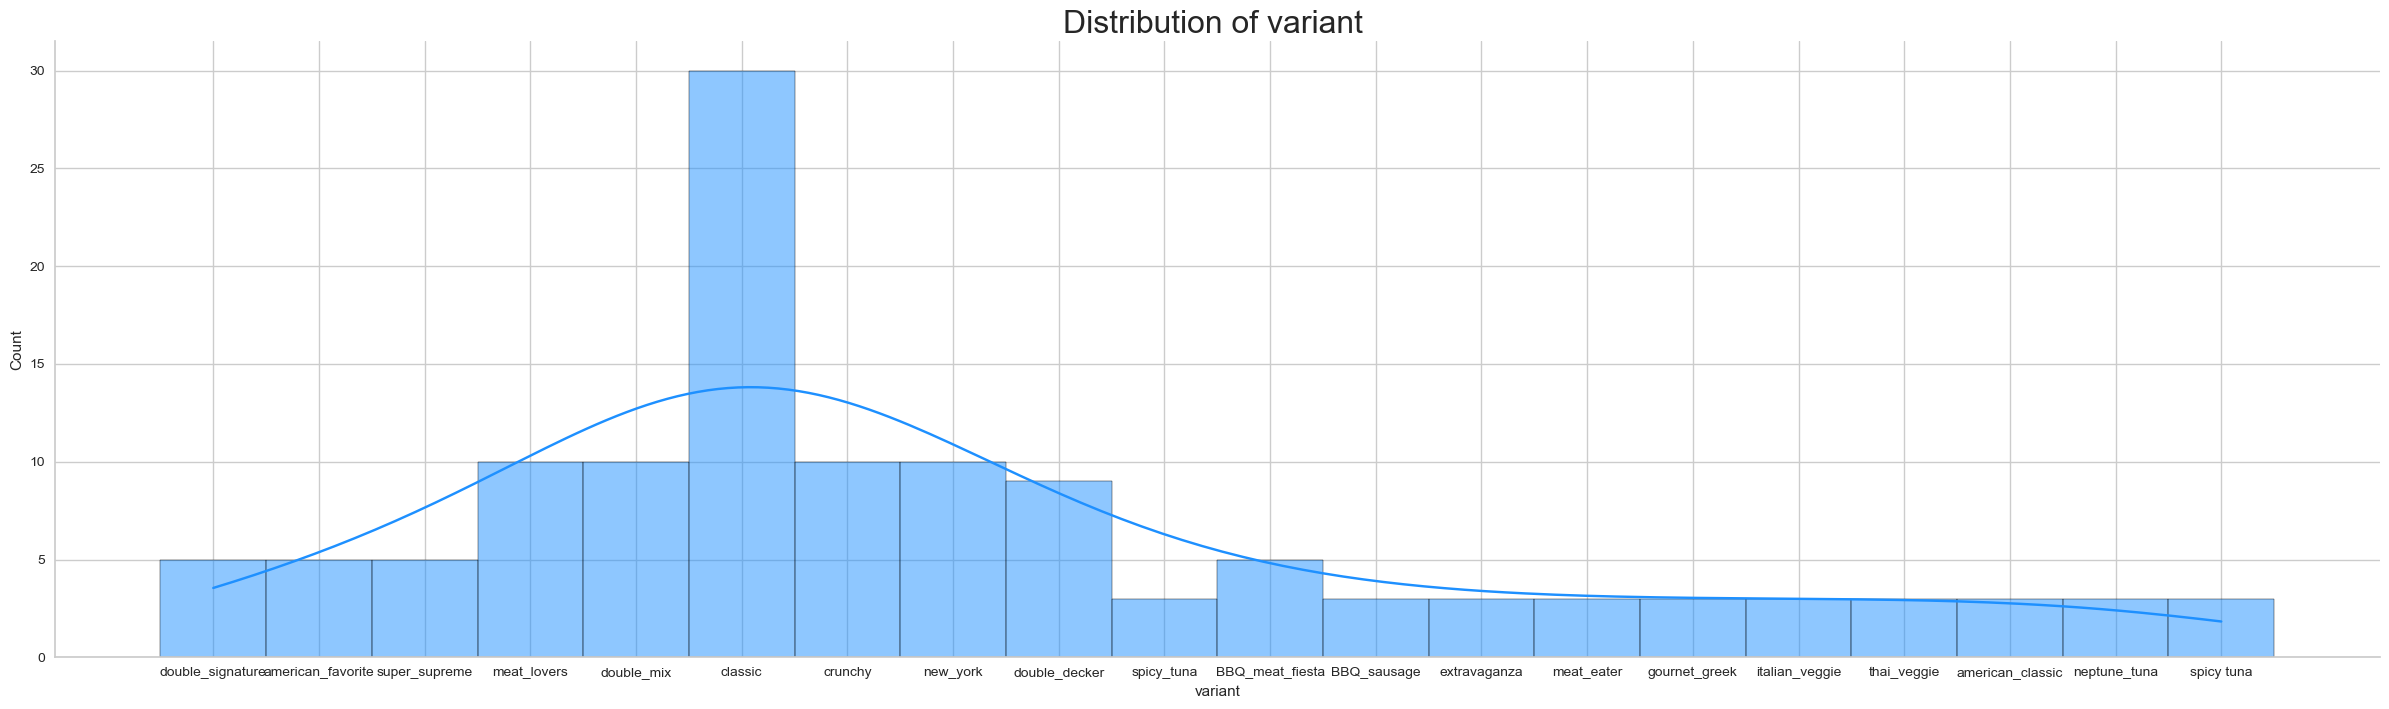

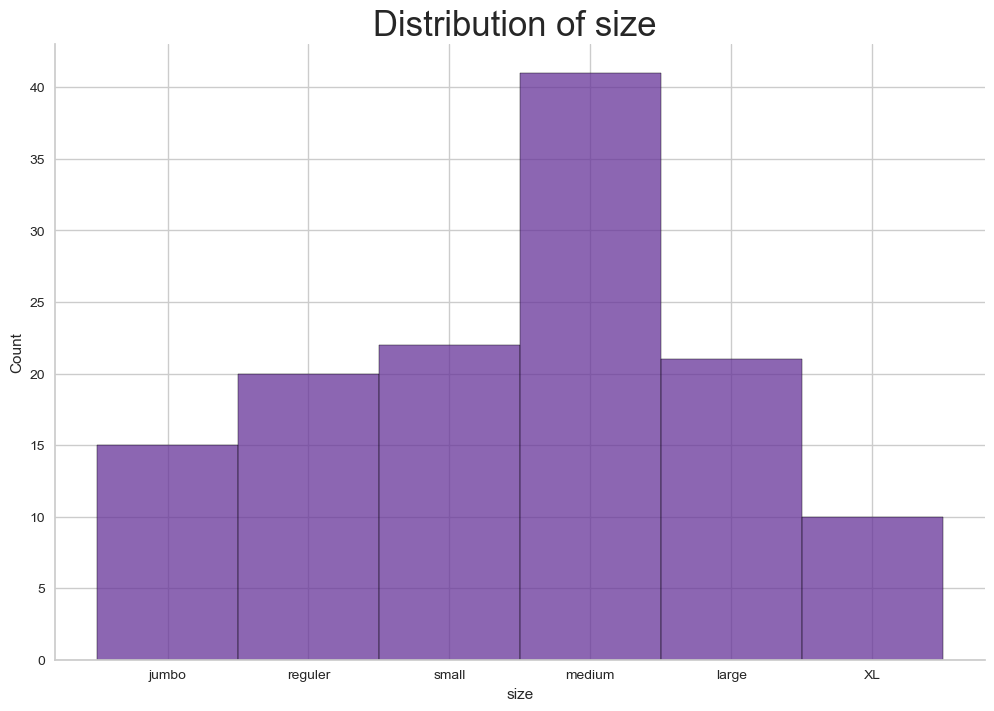

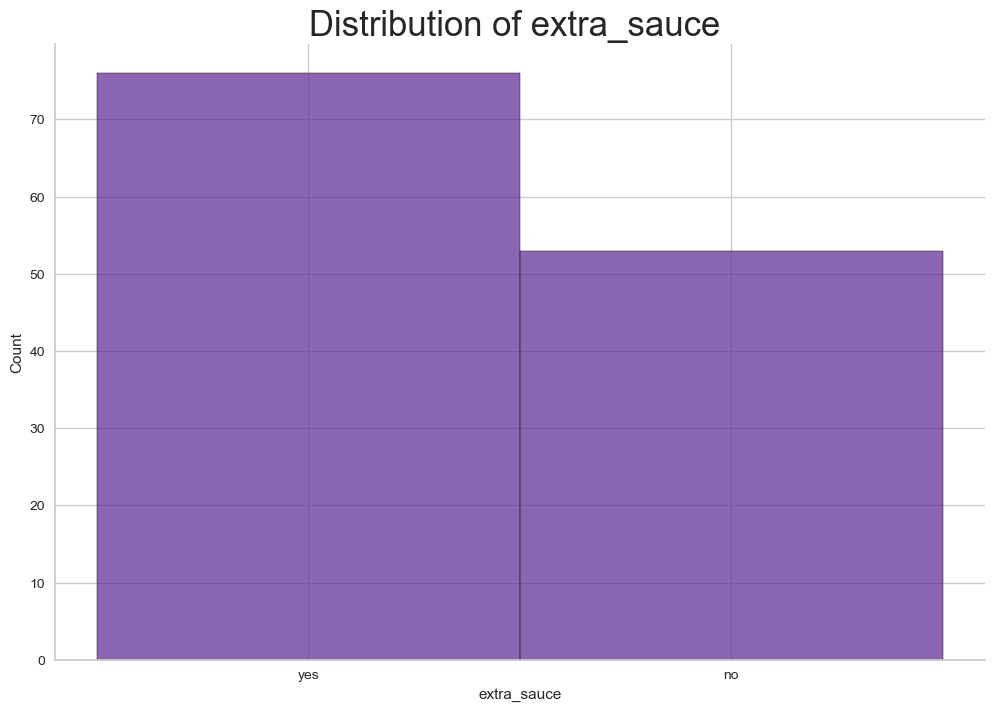

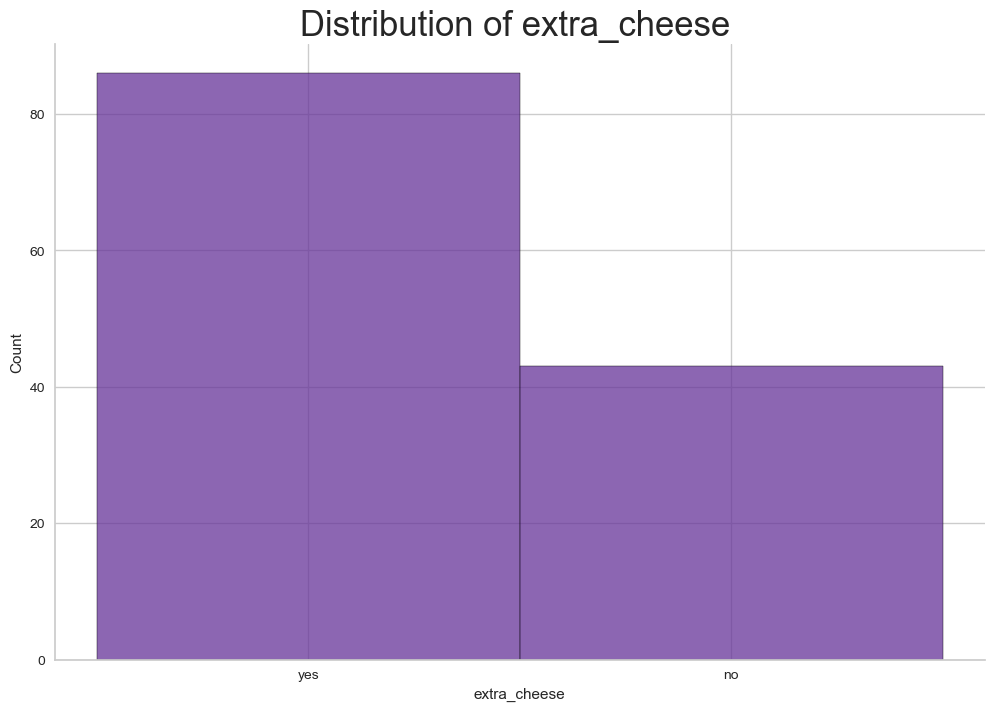

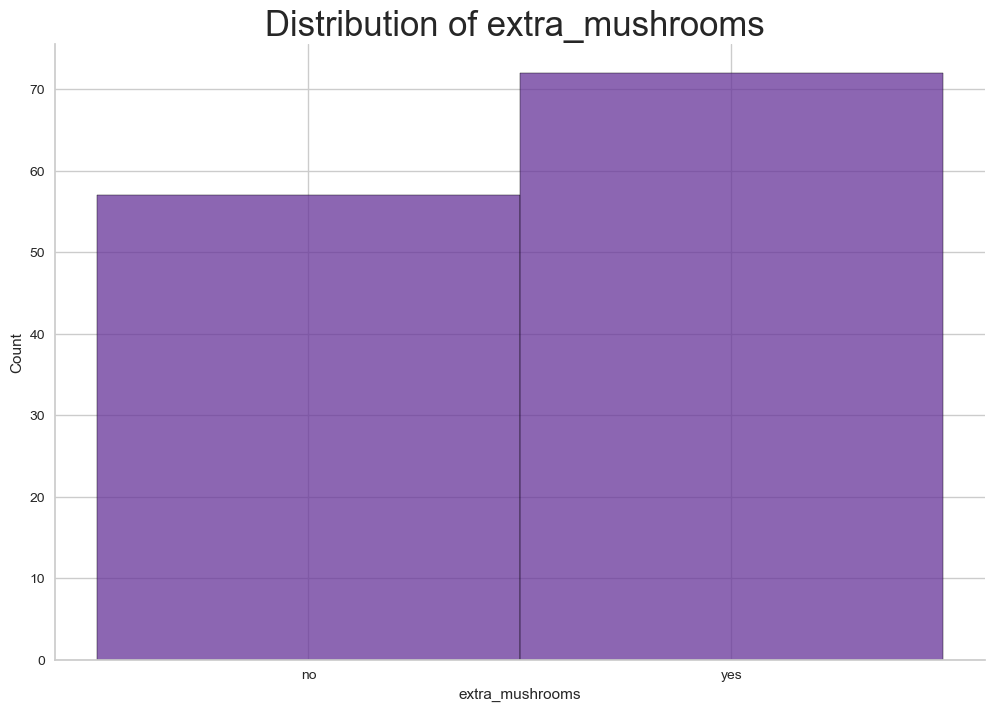

In [13]:
features = pizza_info.columns
for feature in features:
    if pizza_info[feature].nunique() > 10:
        plt.figure(figsize=(30,8))
        sns.histplot(data = features, x = pizza_info[feature], 
                     color = 'dodgerblue', bins = 35, kde = True,)
        plt.title(f"Distribution of {feature} ",fontsize = 23)
        sns.despine()
        plt.show()
    else:
        plt.figure(figsize=(12,8))
        sns.histplot(data = features, x = pizza_info[feature], 
                     color = 'rebeccapurple',kde = False)
        plt.title(f"Distribution of {feature} ",fontsize = 25)
        sns.despine()
        plt.show()

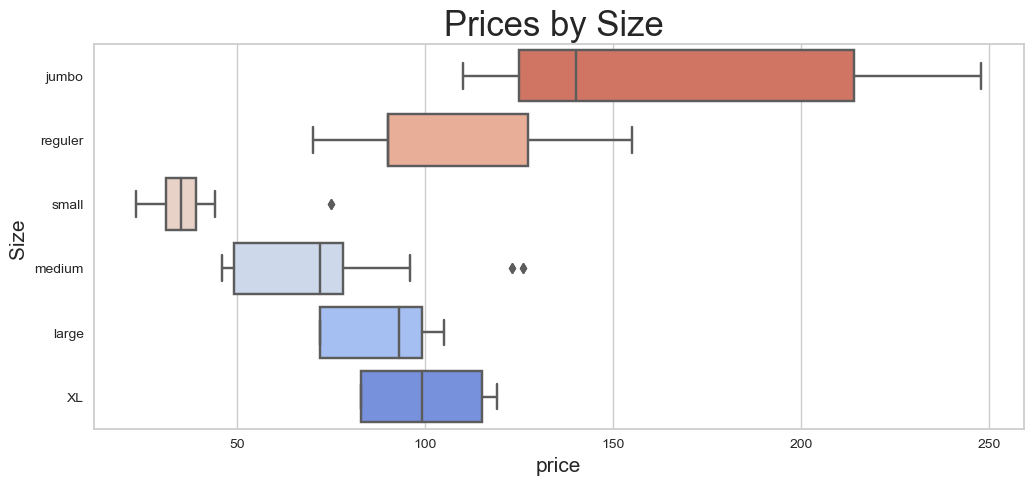

In [14]:
plt.figure(figsize=(12,5))
plt.title("Prices by Size ", fontsize = 25)
sns.boxplot(data = pizza_info, x = 'price', y = 'size', palette = 'coolwarm_r',orient = 'h')
plt.ylabel("Size ", fontsize = 15)
plt.xlabel("price", fontsize = 15)
sns.set_context("poster")
plt.show()

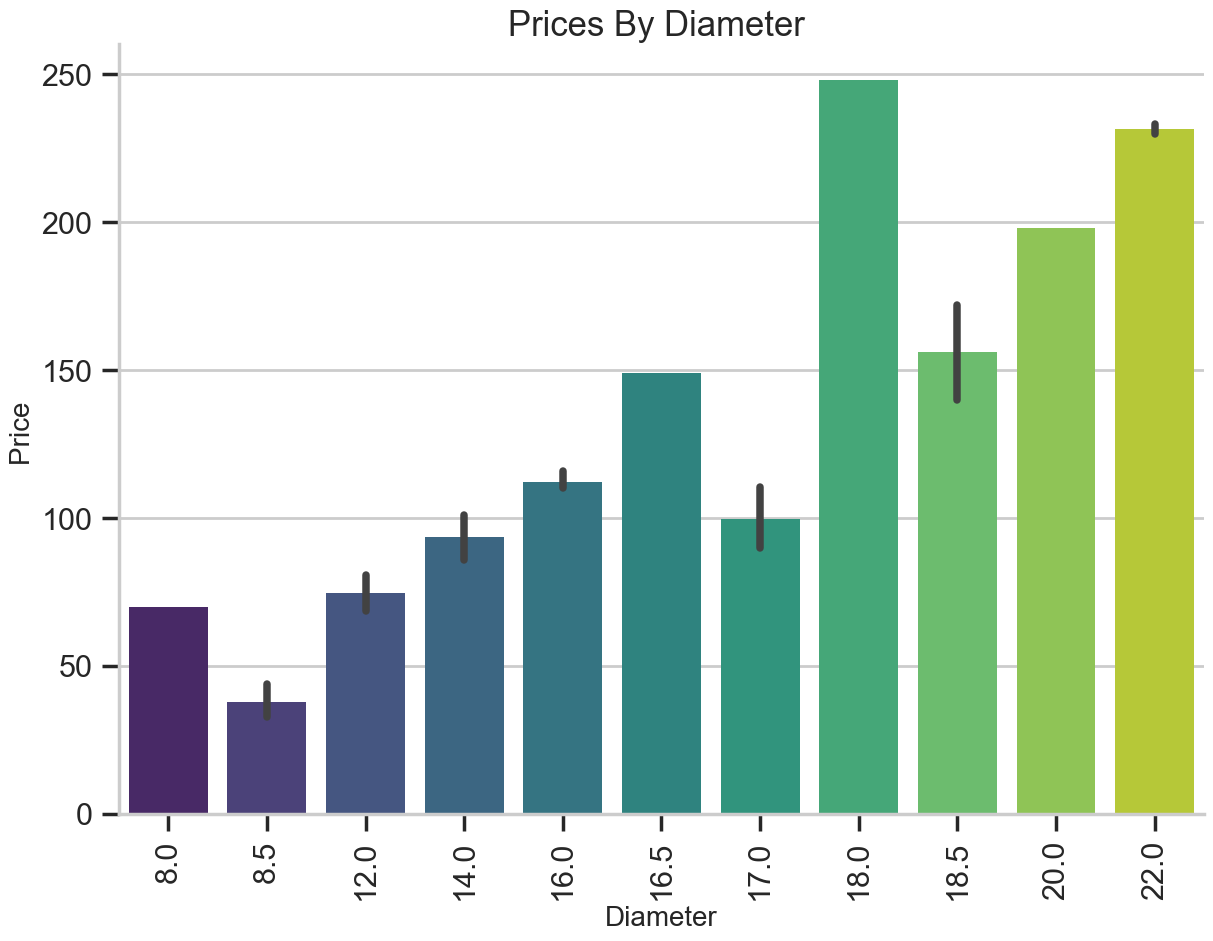

In [15]:
plt.figure(figsize=(14,10))
plt.title("Prices By Diameter ", fontsize = 25)
sns.barplot(data = pizza_info, y = 'price', x = 'diameter',
               palette = 'viridis',)
plt.ylabel("Price ", fontsize = 20)
plt.xlabel("Diameter", fontsize = 20)
sns.despine()
plt.xticks(rotation=90)
plt.show()

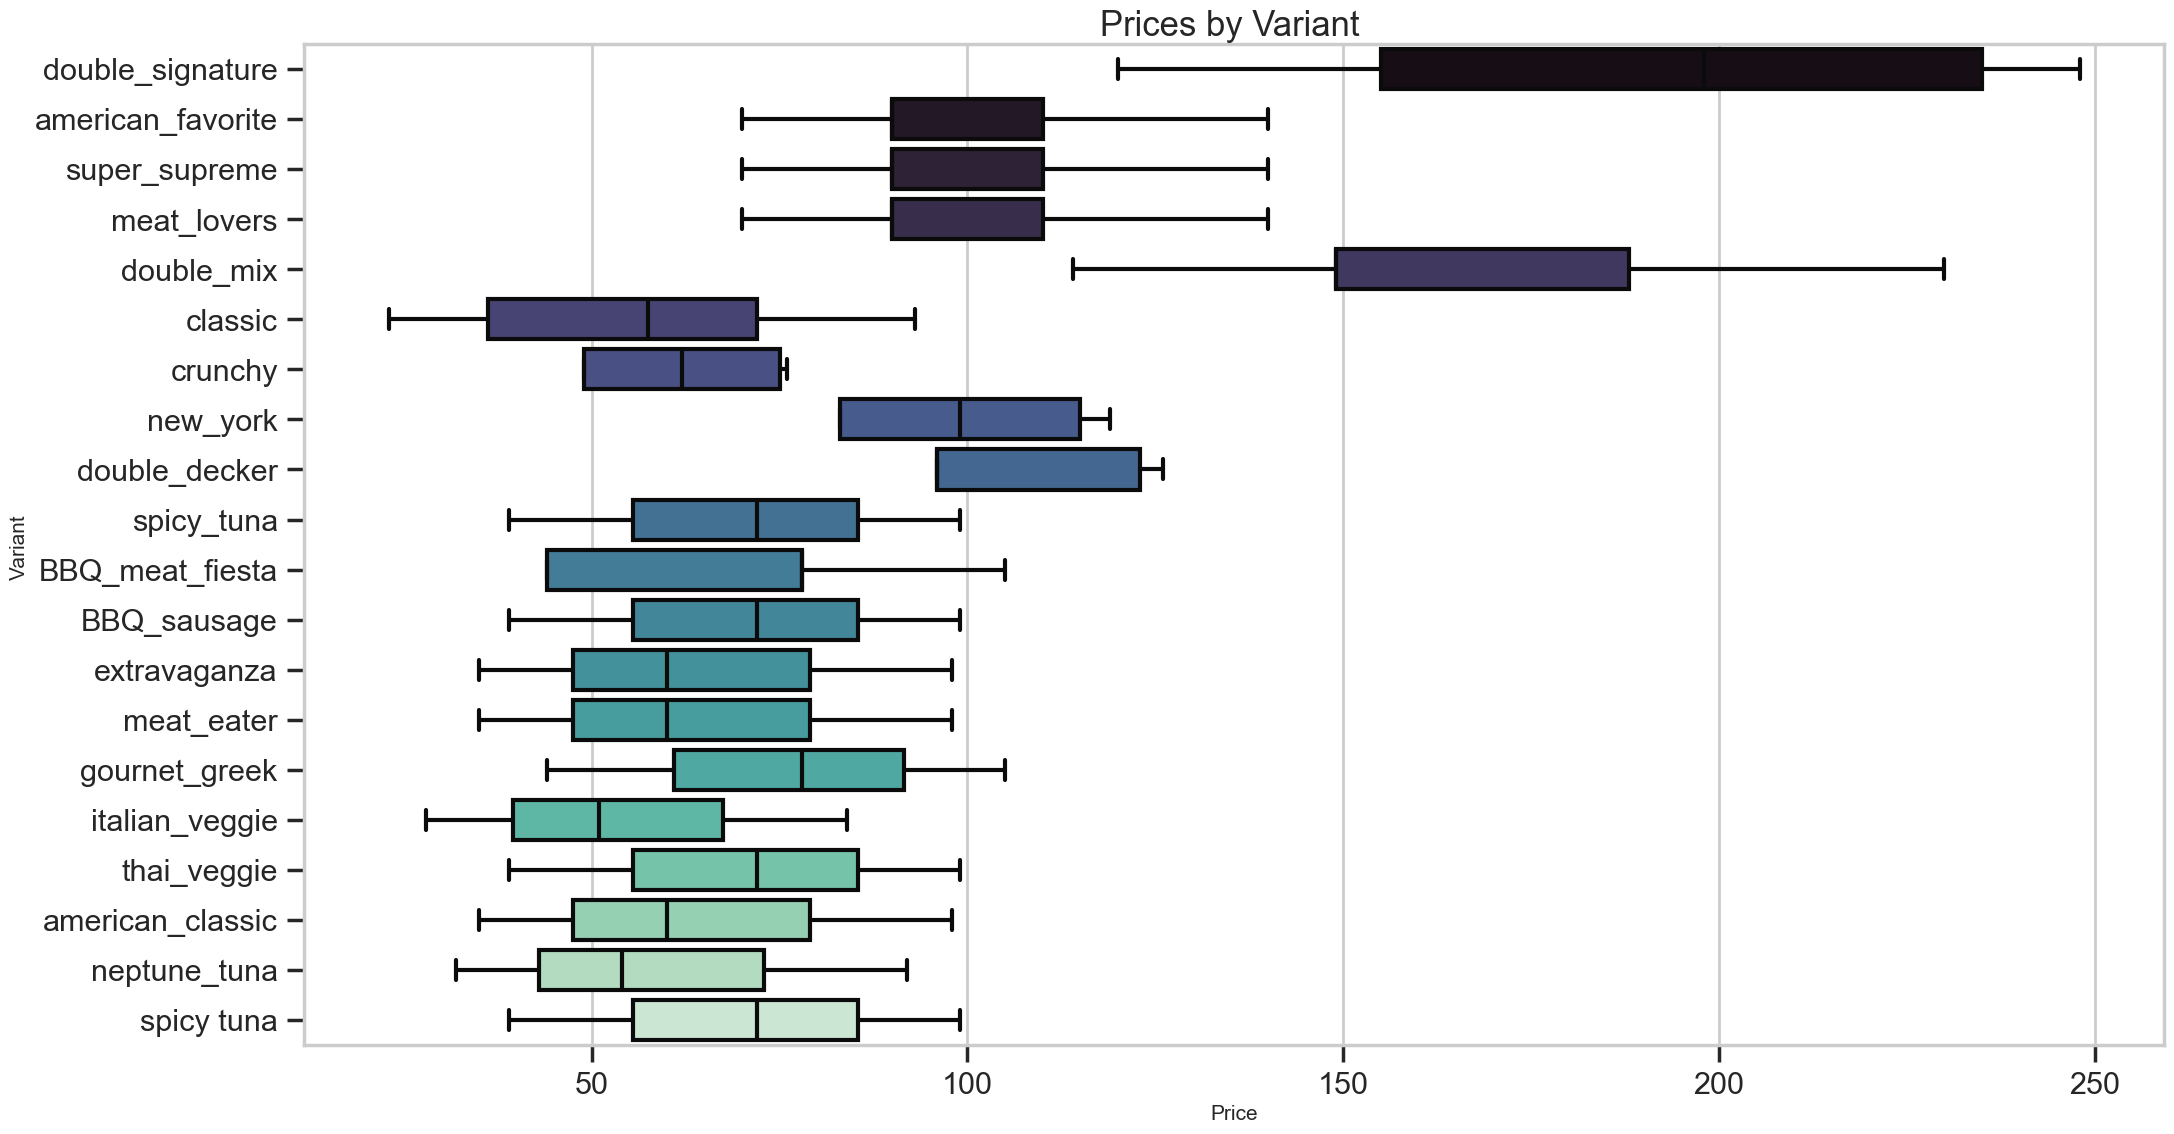

In [16]:
plt.figure(figsize=(24,13))
plt.title("Prices by Variant ",fontsize = 25)
sns.boxplot(data = pizza_info, x = 'price', y = 'variant', palette = 'mako', orient = 'h')
plt.ylabel("Variant ", fontsize = 15)
plt.xlabel("Price", fontsize = 15)
sns.set_context("talk")
plt.show()

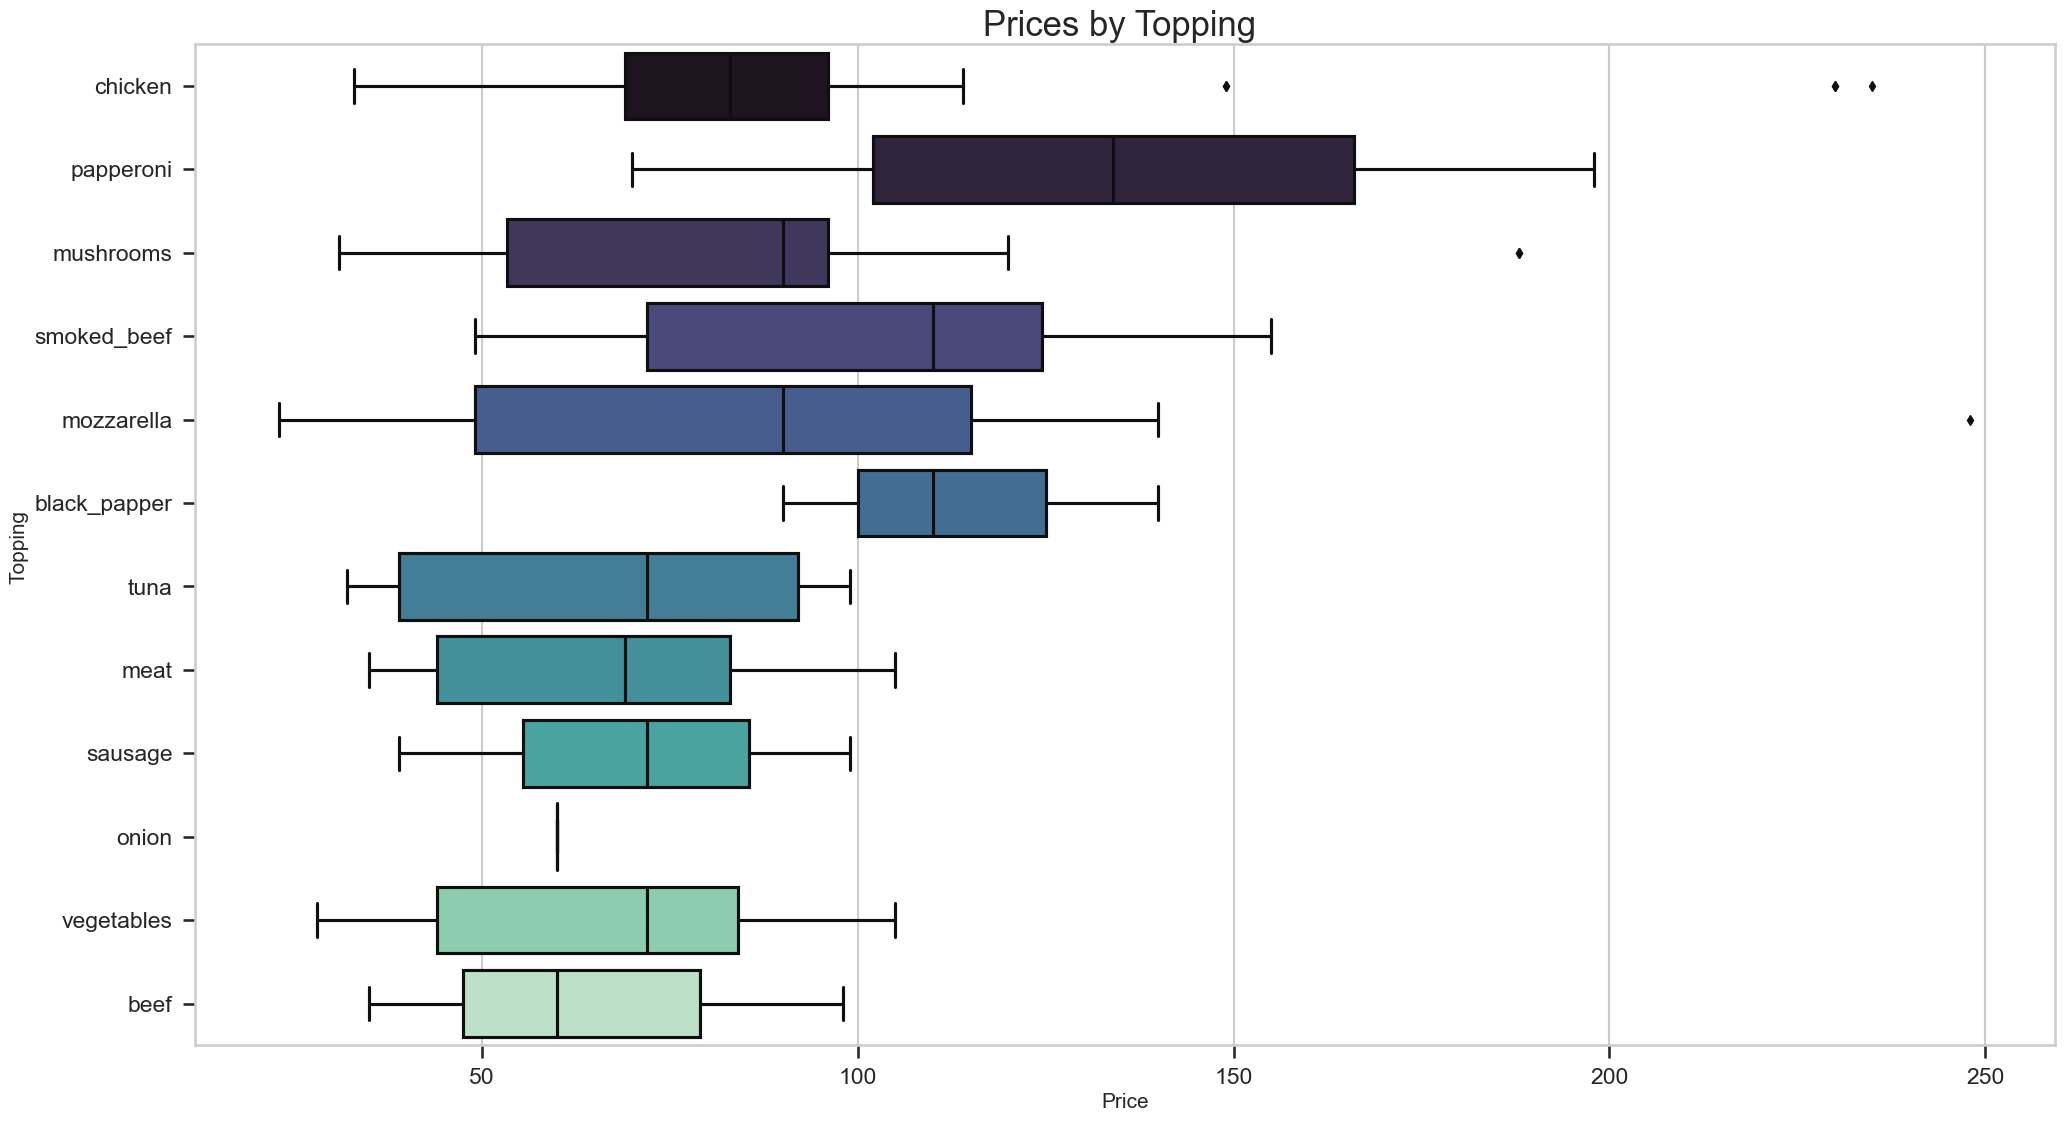

In [17]:
plt.figure(figsize=(24,13))
plt.title("Prices by Topping ",fontsize = 25)
sns.boxplot(data = pizza_info, x = 'price', y = 'topping', palette = 'mako', orient = 'h')
plt.ylabel("Topping ", fontsize = 15)
plt.xlabel("Price", fontsize = 15)
sns.set_context("talk")
plt.show()

Text(0.5, 1.0, 'Prices By extra cheese')

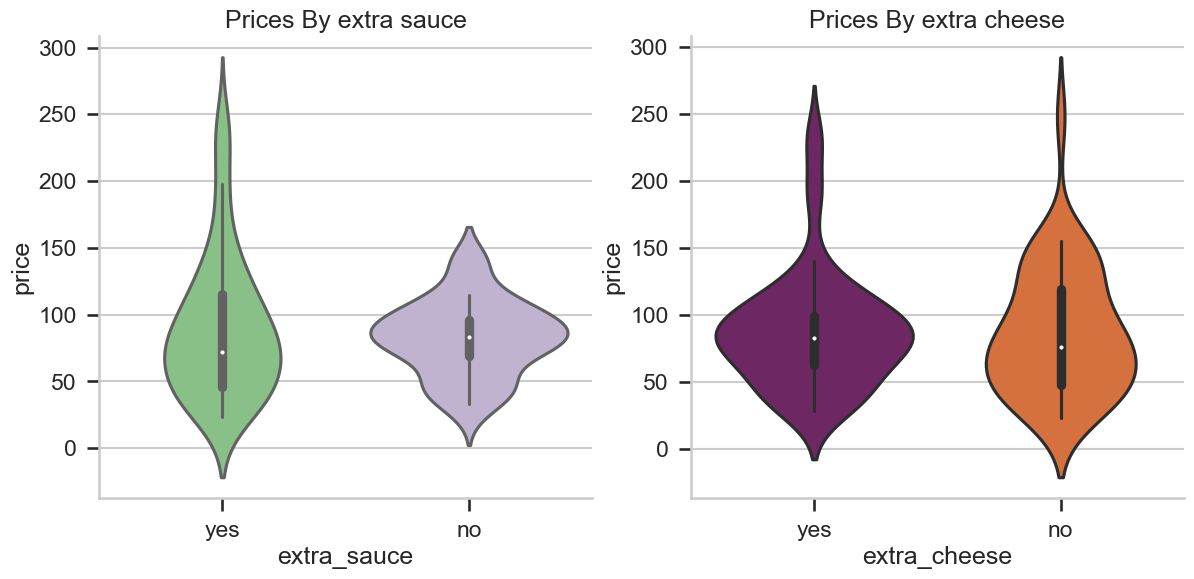

In [18]:
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(121)
sns.violinplot(x='extra_sauce', y='price',data=pizza_info,palette='Accent',ax=ax)
ax.set_title('Prices By extra sauce')

ax = f.add_subplot(122)
sns.violinplot(x='extra_cheese', y='price',data=pizza_info,palette='inferno',ax=ax)
sns.despine()
ax.set_title('Prices By extra cheese')

Text(0.5, 1.0, 'Prices By extra mushrooms')

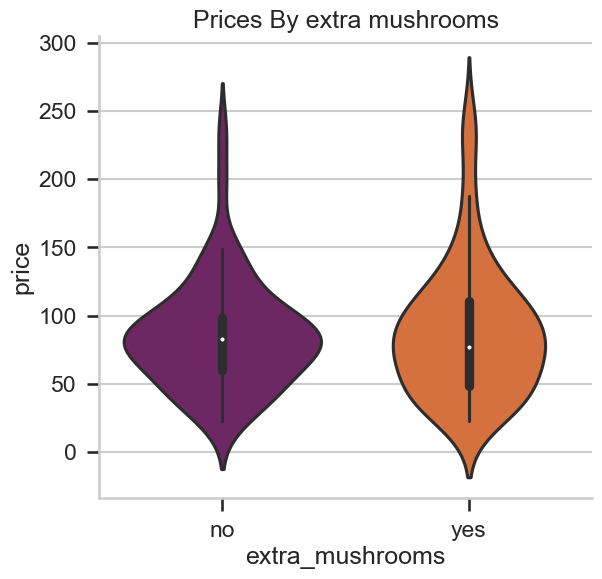

In [19]:
f = plt.figure(figsize=(14,6))
ax = f.add_subplot(121)
sns.violinplot(x='extra_mushrooms', y='price',data=pizza_info,palette='inferno',ax=ax)
sns.despine()
ax.set_title('Prices By extra mushrooms')

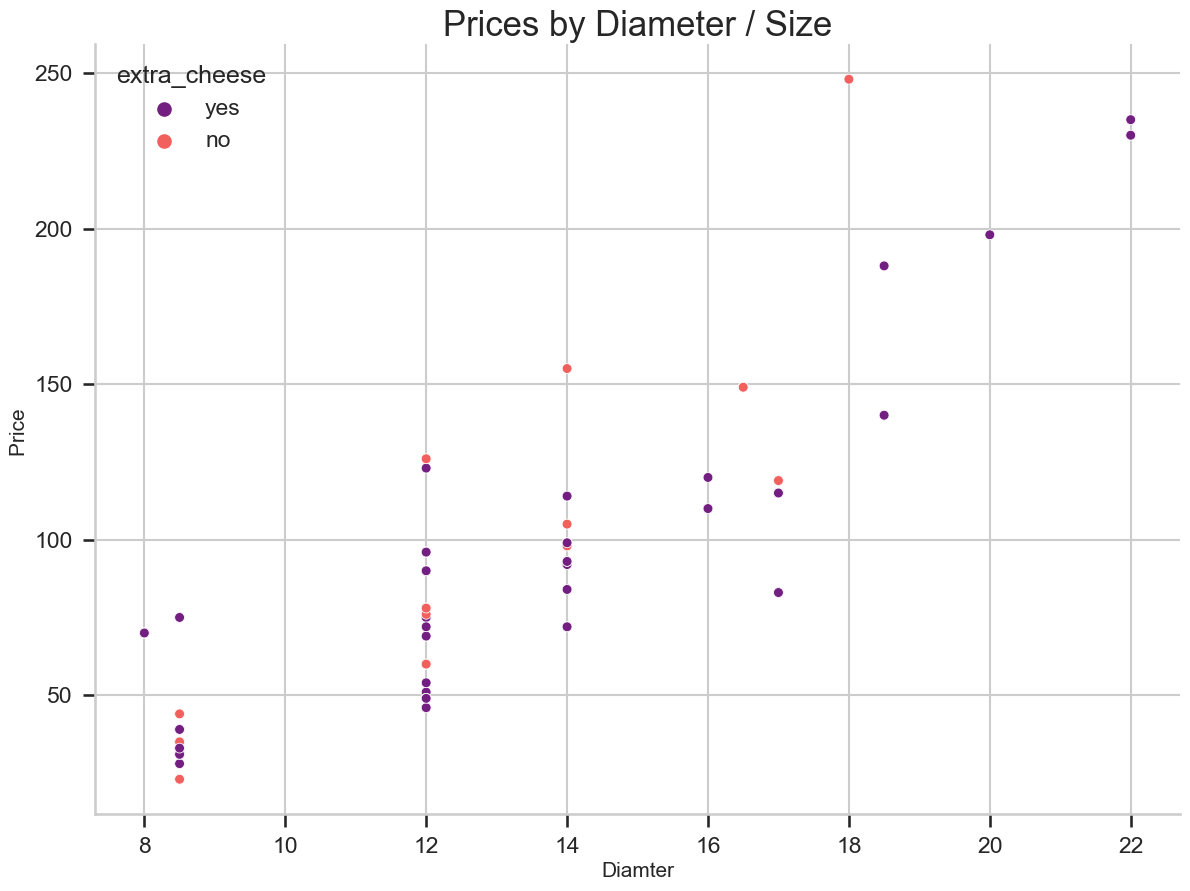

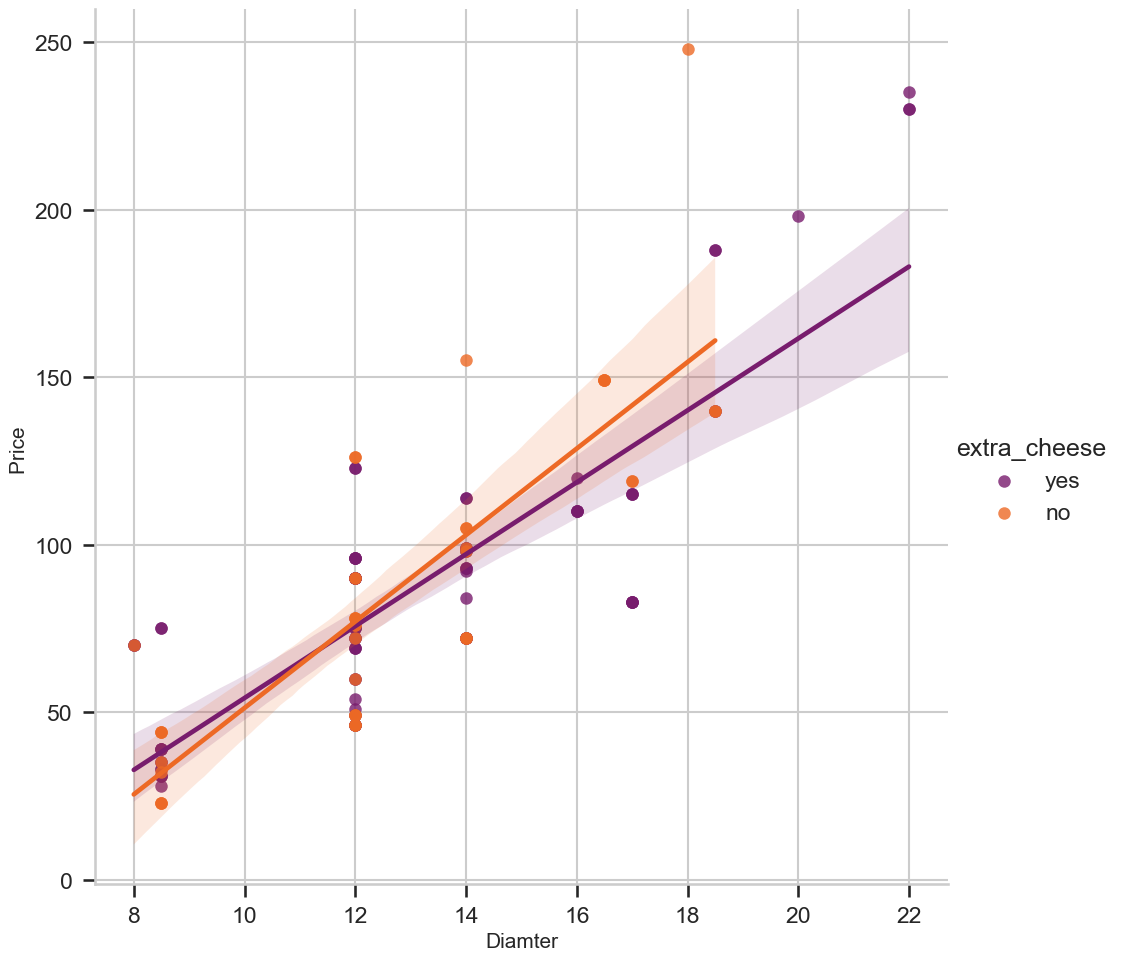

In [20]:
plt.figure(figsize=(14,10))
plt.title("Prices by Diameter / Size",fontsize = 25)
sns.scatterplot(data = pizza_info, y = 'price', x = 'diameter', hue = 'extra_cheese',
               palette = 'magma', s = 50)
plt.ylabel("Price ", fontsize = 15)
plt.xlabel("Diamter", fontsize = 15)
sns.despine()
plt.show()


sns.lmplot(x="diameter", y="price", hue="extra_cheese", data=pizza_info, palette = 'inferno', height = 10)
plt.ylabel("Price ", fontsize = 15)
plt.xlabel("Diamter", fontsize = 15)
plt.show()

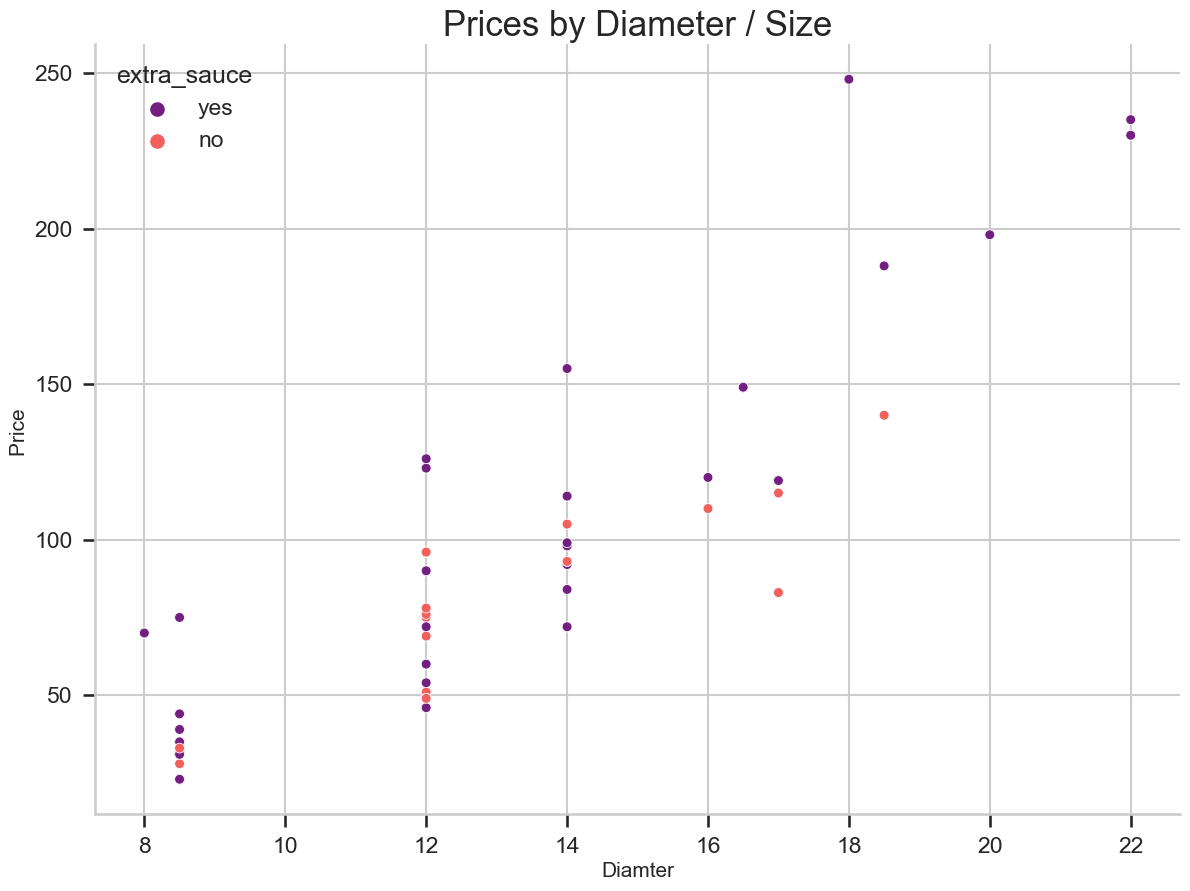

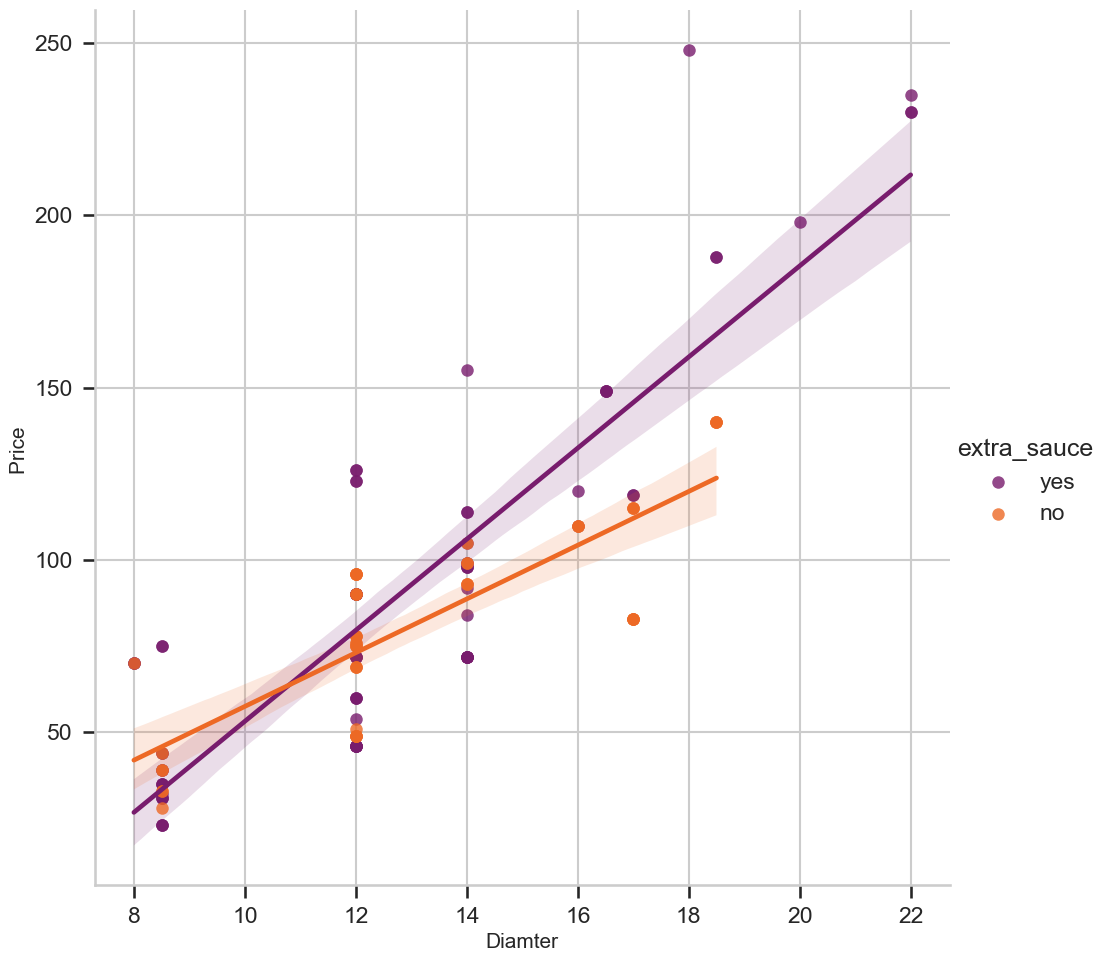

In [21]:
plt.figure(figsize=(14,10))
plt.title("Prices by Diameter / Size",fontsize = 25)
sns.scatterplot(data = pizza_info, y = 'price', x = 'diameter', hue = 'extra_sauce',
               palette = 'magma', s = 50)
plt.ylabel("Price ", fontsize = 15)
plt.xlabel("Diamter", fontsize = 15)
sns.despine()
plt.show()


sns.lmplot(x="diameter", y="price", hue="extra_sauce", data=pizza_info, palette = 'inferno', height = 10)
plt.ylabel("Price ", fontsize = 15)
plt.xlabel("Diamter", fontsize = 15)
plt.show()

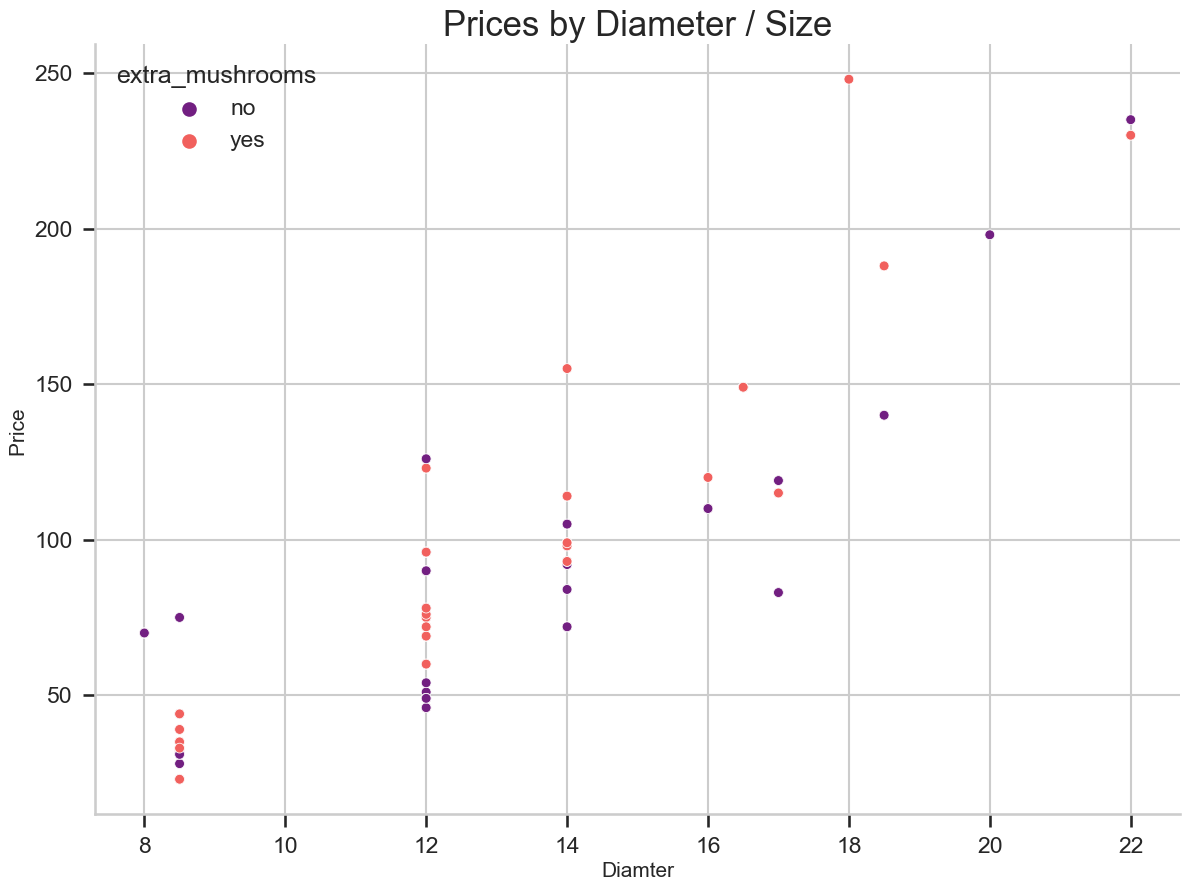

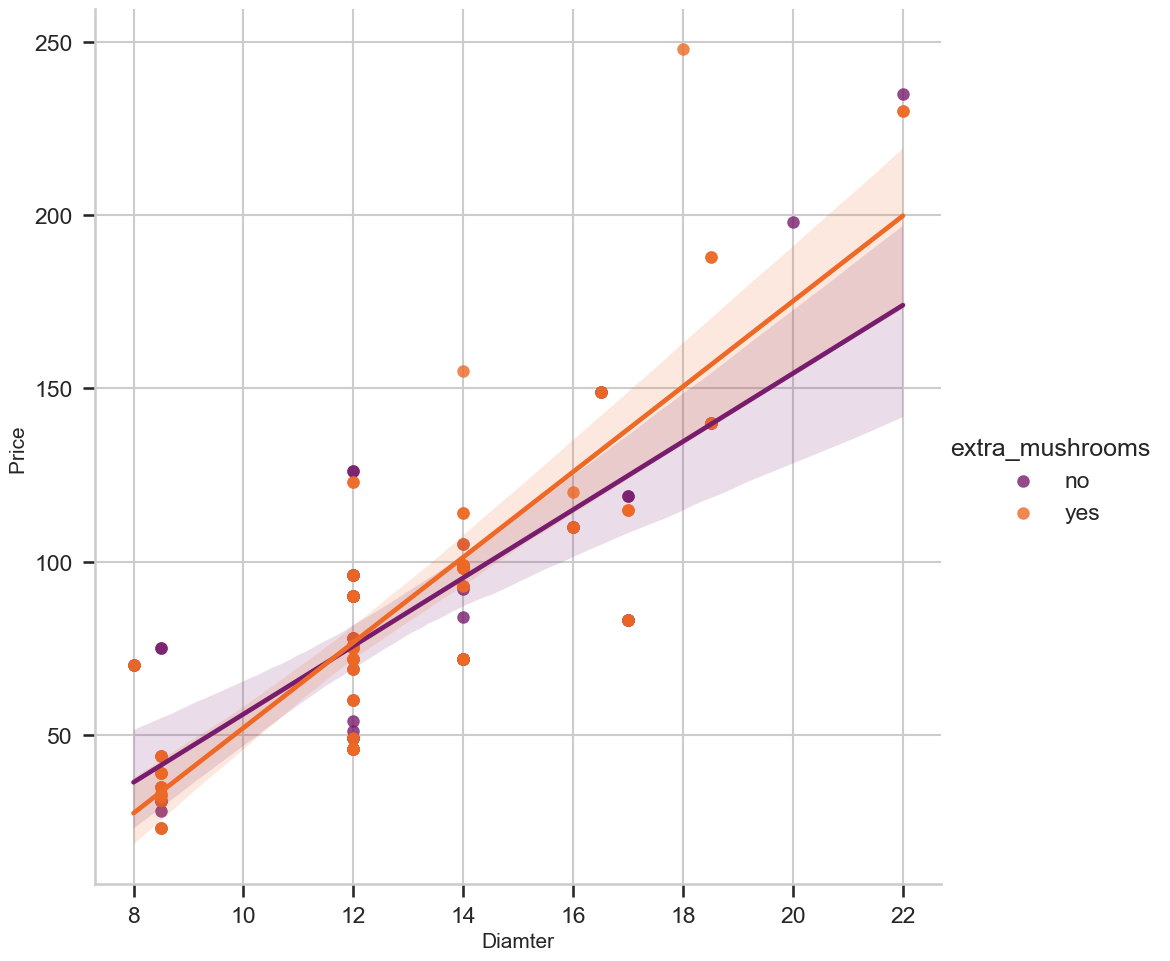

In [22]:
plt.figure(figsize=(14,10))
plt.title("Prices by Diameter / Size",fontsize = 25)
sns.scatterplot(data = pizza_info, y = 'price', x = 'diameter', hue = 'extra_mushrooms',
               palette = 'magma', s = 50)
plt.ylabel("Price ", fontsize = 15)
plt.xlabel("Diamter", fontsize = 15)
sns.despine()
plt.show()


sns.lmplot(x="diameter", y="price", hue="extra_mushrooms", data=pizza_info, palette = 'inferno', height = 10)
plt.ylabel("Price ", fontsize = 15)
plt.xlabel("Diamter", fontsize = 15)
plt.show()

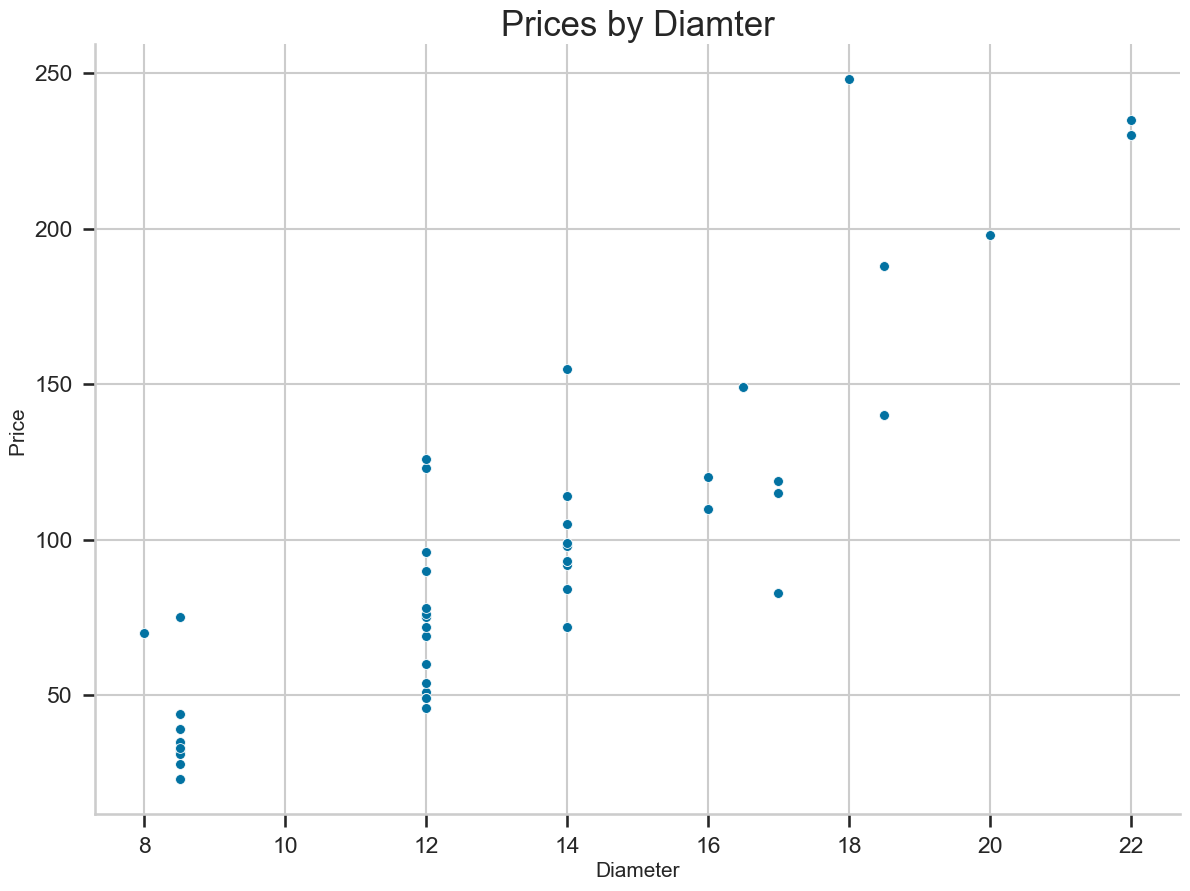

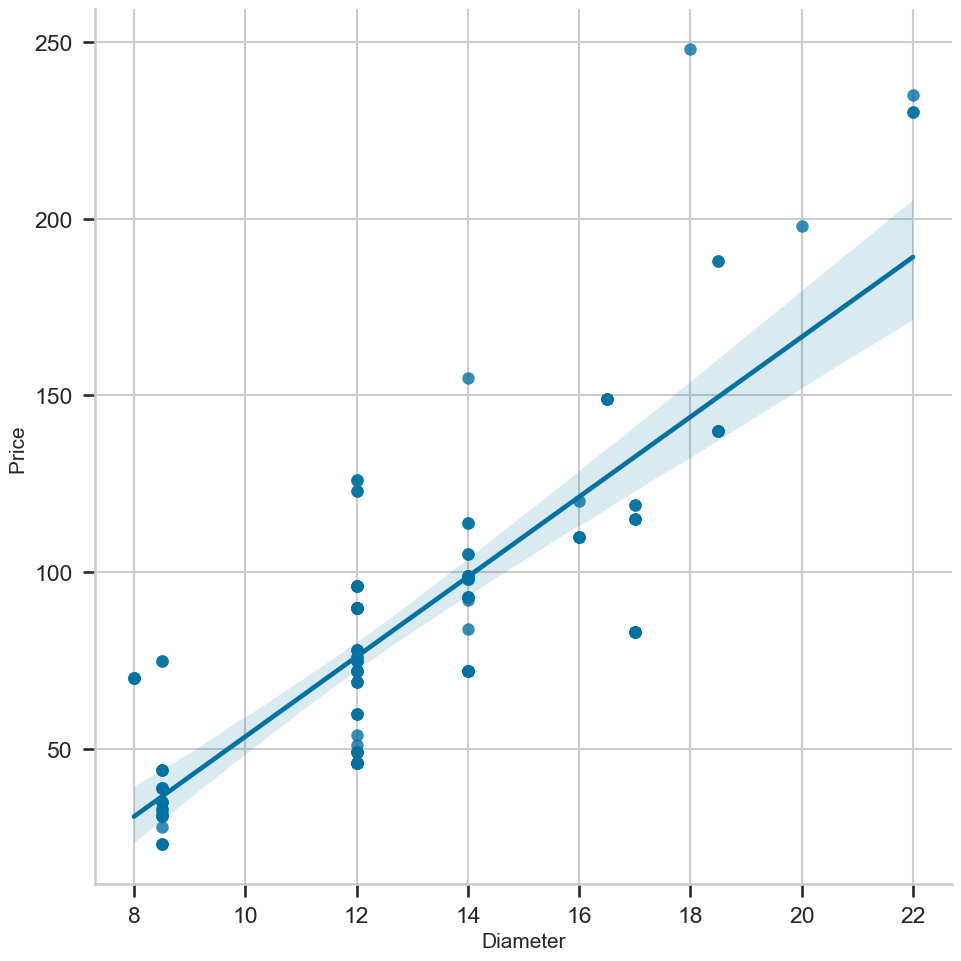

In [23]:
plt.figure(figsize=(14,10))
plt.title("Prices by Diamter",fontsize = 25)
sns.scatterplot(data = pizza_info, y = 'price', x = 'diameter',
               palette = 'magma', s = 50)
plt.ylabel("Price ", fontsize = 15)
plt.xlabel("Diameter", fontsize = 15)
sns.despine()
plt.show()


sns.lmplot(x="diameter", y="price", data=pizza_info, palette = 'inferno', height = 10)
plt.ylabel("Price ", fontsize = 15)
plt.xlabel("Diameter", fontsize = 15)
plt.show()

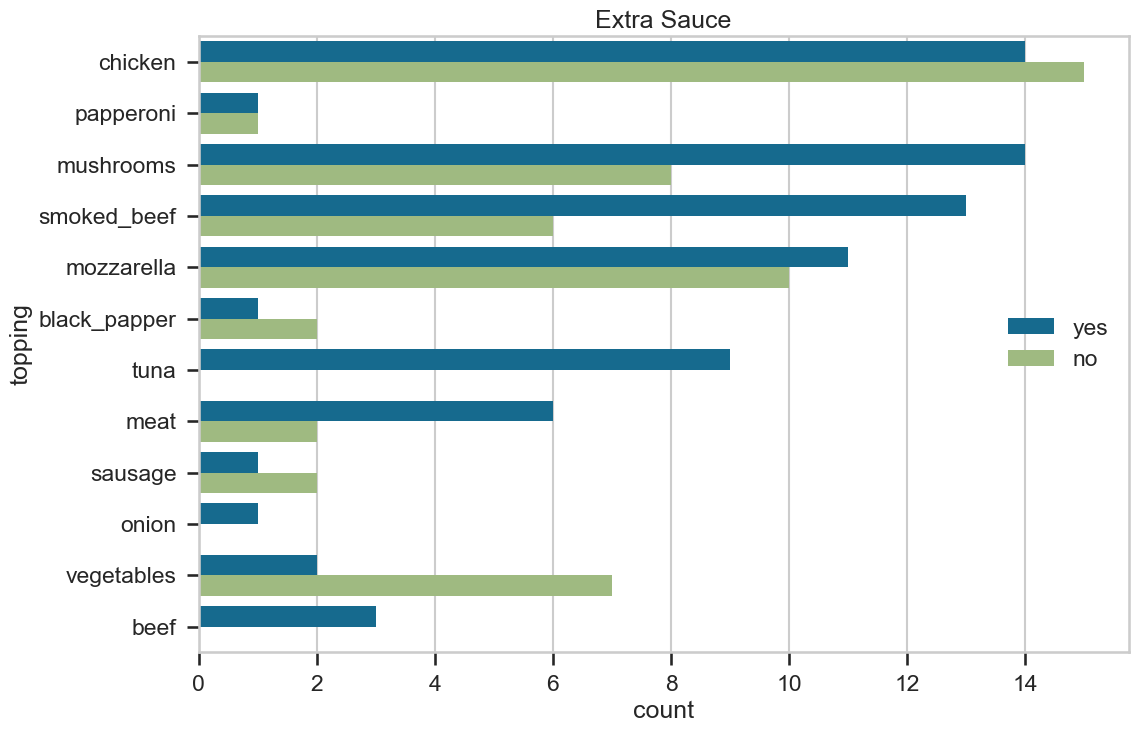

In [24]:
#topping with extra sauce
fig=plt.figure(figsize=(12,8))
sns.countplot(data=pizza_info, y="topping", hue="extra_sauce")
plt.title("Extra Sauce")
plt.legend(loc="center right")
plt.show()

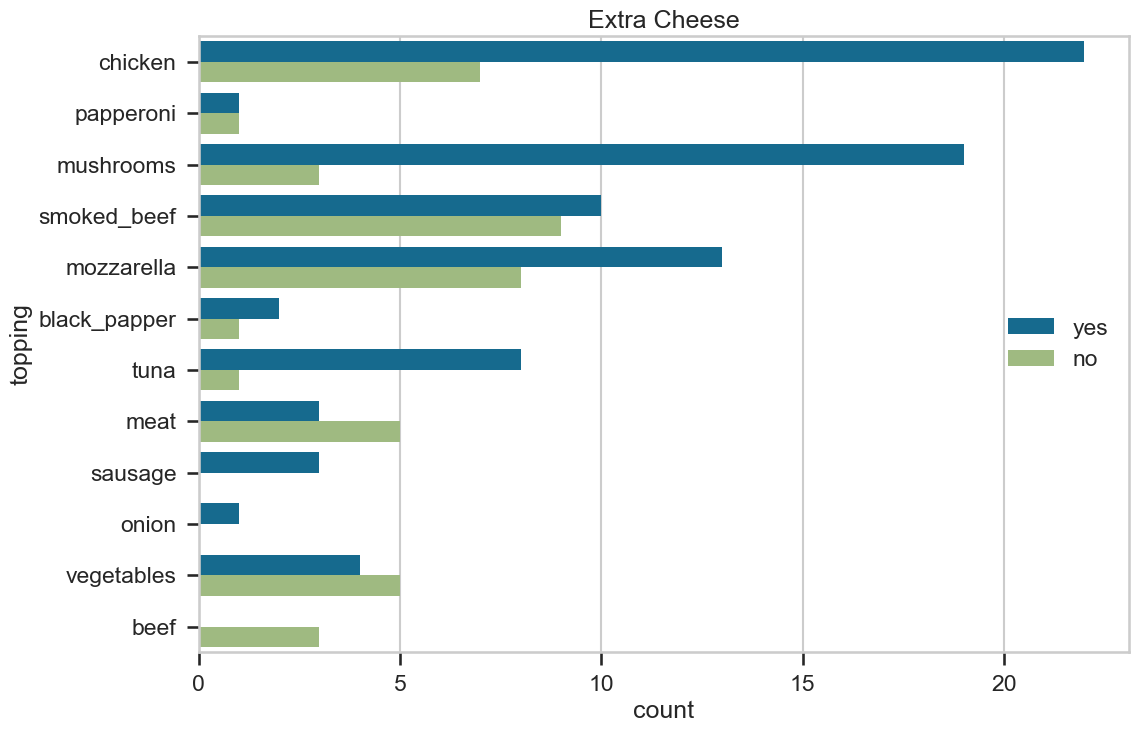

In [25]:
#topping with extra cheese
fig=plt.figure(figsize=(12,8))
sns.countplot(data=pizza_info, y="topping", hue="extra_cheese")
plt.title("Extra Cheese")
plt.legend(loc="center right")
plt.show()

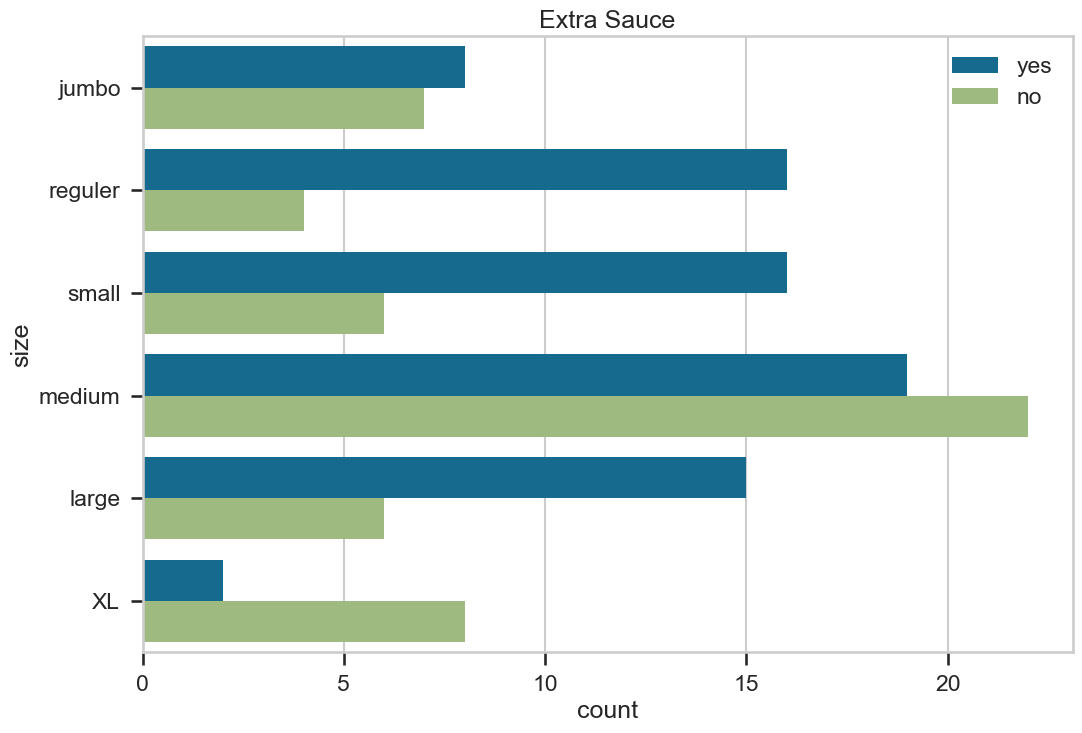

In [26]:
#size with extra sauce
fig=plt.figure(figsize=(12,8))
sns.countplot(data=pizza_info, y="size", hue="extra_sauce")
plt.title("Extra Sauce")
plt.legend(loc="upper right")
plt.show()

In [27]:
# Transforming the data type
columns = ['company', 'topping', 'variant','size','extra_sauce', 'extra_cheese', 'extra_mushrooms']
labelencoder = LabelEncoder()
for i in columns:
    pizza_info[i] = labelencoder.fit_transform(pizza_info[i])
    print( i ," ",pizza_info[i].unique())

company   [0 1 2 3 4]
topping   [ 2  7  5  9  4  1 10  3  8  6 11  0]
variant   [ 8  3 18 13  7  4  5 15  6 17  0  1  9 12 10 11 19  2 14 16]
size   [1 4 5 3 2 0]
extra_sauce   [1 0]
extra_cheese   [1 0]
extra_mushrooms   [0 1]


In [28]:
pizza_info.describe()

,company,price,diameter,topping,variant,size,extra_sauce,extra_cheese,extra_mushrooms
count,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000
mean,2.046512,87.131783,12.976744,5.294574,8.155039,2.868217,0.589147,0.666667,0.558140
std,1.435381,44.716010,3.272674,3.204984,5.265527,1.470437,0.493907,0.473242,0.498544
min,0.000000,23.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,51.000000,12.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000
50%,2.000000,78.000000,12.000000,5.000000,6.000000,3.000000,1.000000,1.000000,1.000000
75%,3.000000,105.000000,14.000000,9.000000,13.000000,4.000000,1.000000,1.000000,1.000000
max,4.000000,248.000000,22.000000,11.000000,19.000000,5.000000,1.000000,1.000000,1.000000


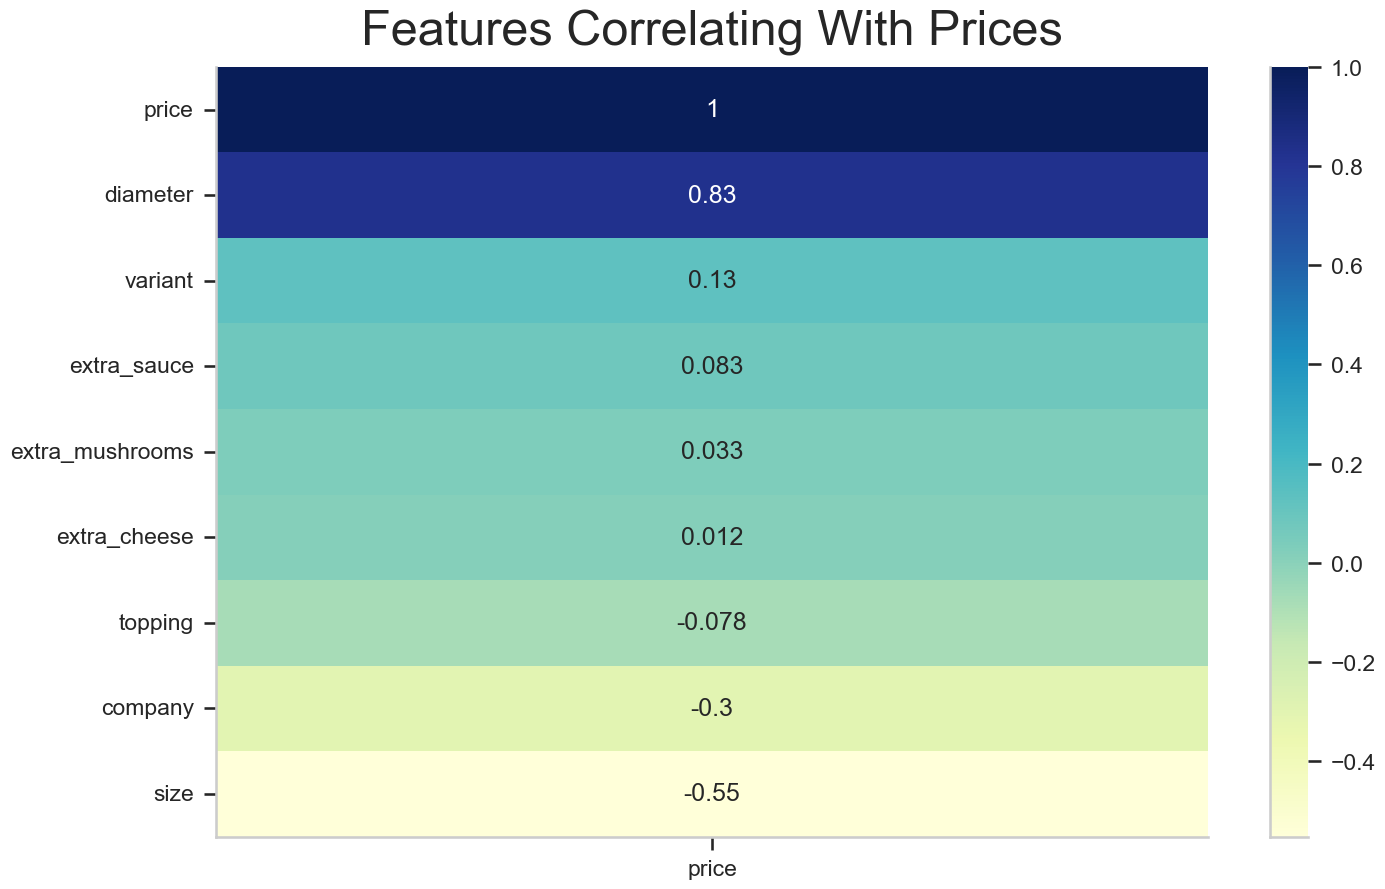

In [29]:
# To find correlation
plt.figure(figsize=(16,10))
heatmap = sns.heatmap(pizza_info.corr()[['price']].sort_values(by='price', ascending=False), annot=True, cmap='YlGnBu')
heatmap.set_title('Features Correlating With Prices', fontdict={'fontsize':35}, pad=16);
sns.despine()
plt.show()

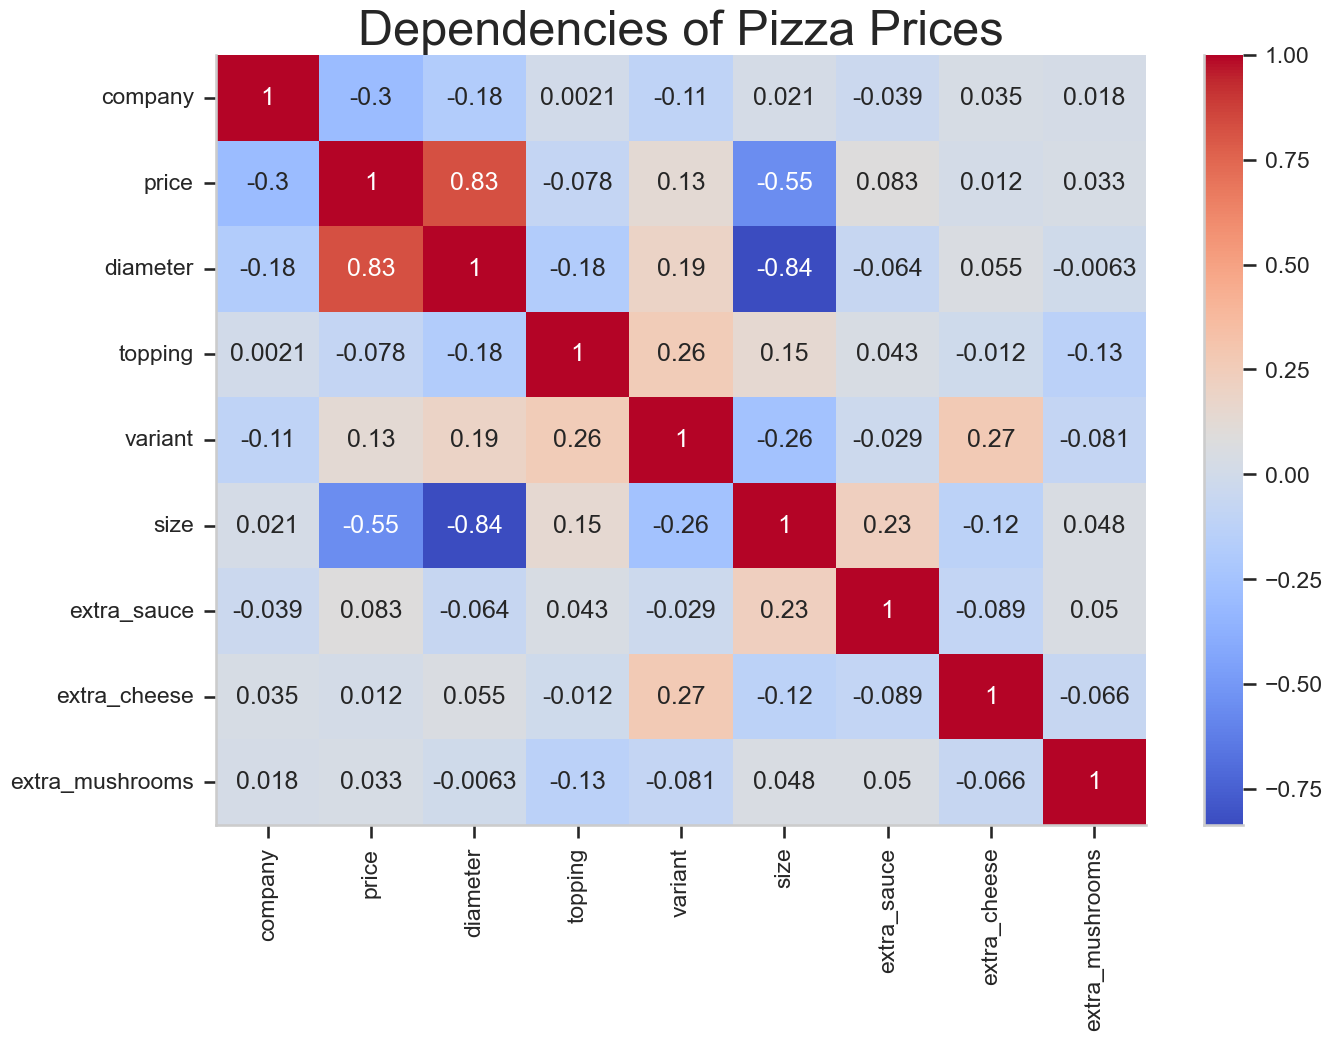

In [30]:
#Correlation using heatmap
plt.figure(figsize = (15, 10))
plt.title("Dependencies of Pizza Prices",fontsize = 35)
sns.heatmap(pizza_info.corr(), annot = True, cmap="coolwarm",cbar=True,
            linewidths=0,linecolor='white',)
sns.despine()
plt.show()

In [31]:
pizza_info.corr()['price'].sort_values()

size              -0.551879
company           -0.300134
topping           -0.077954
extra_cheese       0.012429
extra_mushrooms    0.033121
extra_sauce        0.083477
variant            0.130644
diameter           0.827205
price              1.000000
Name: price, dtype: float64

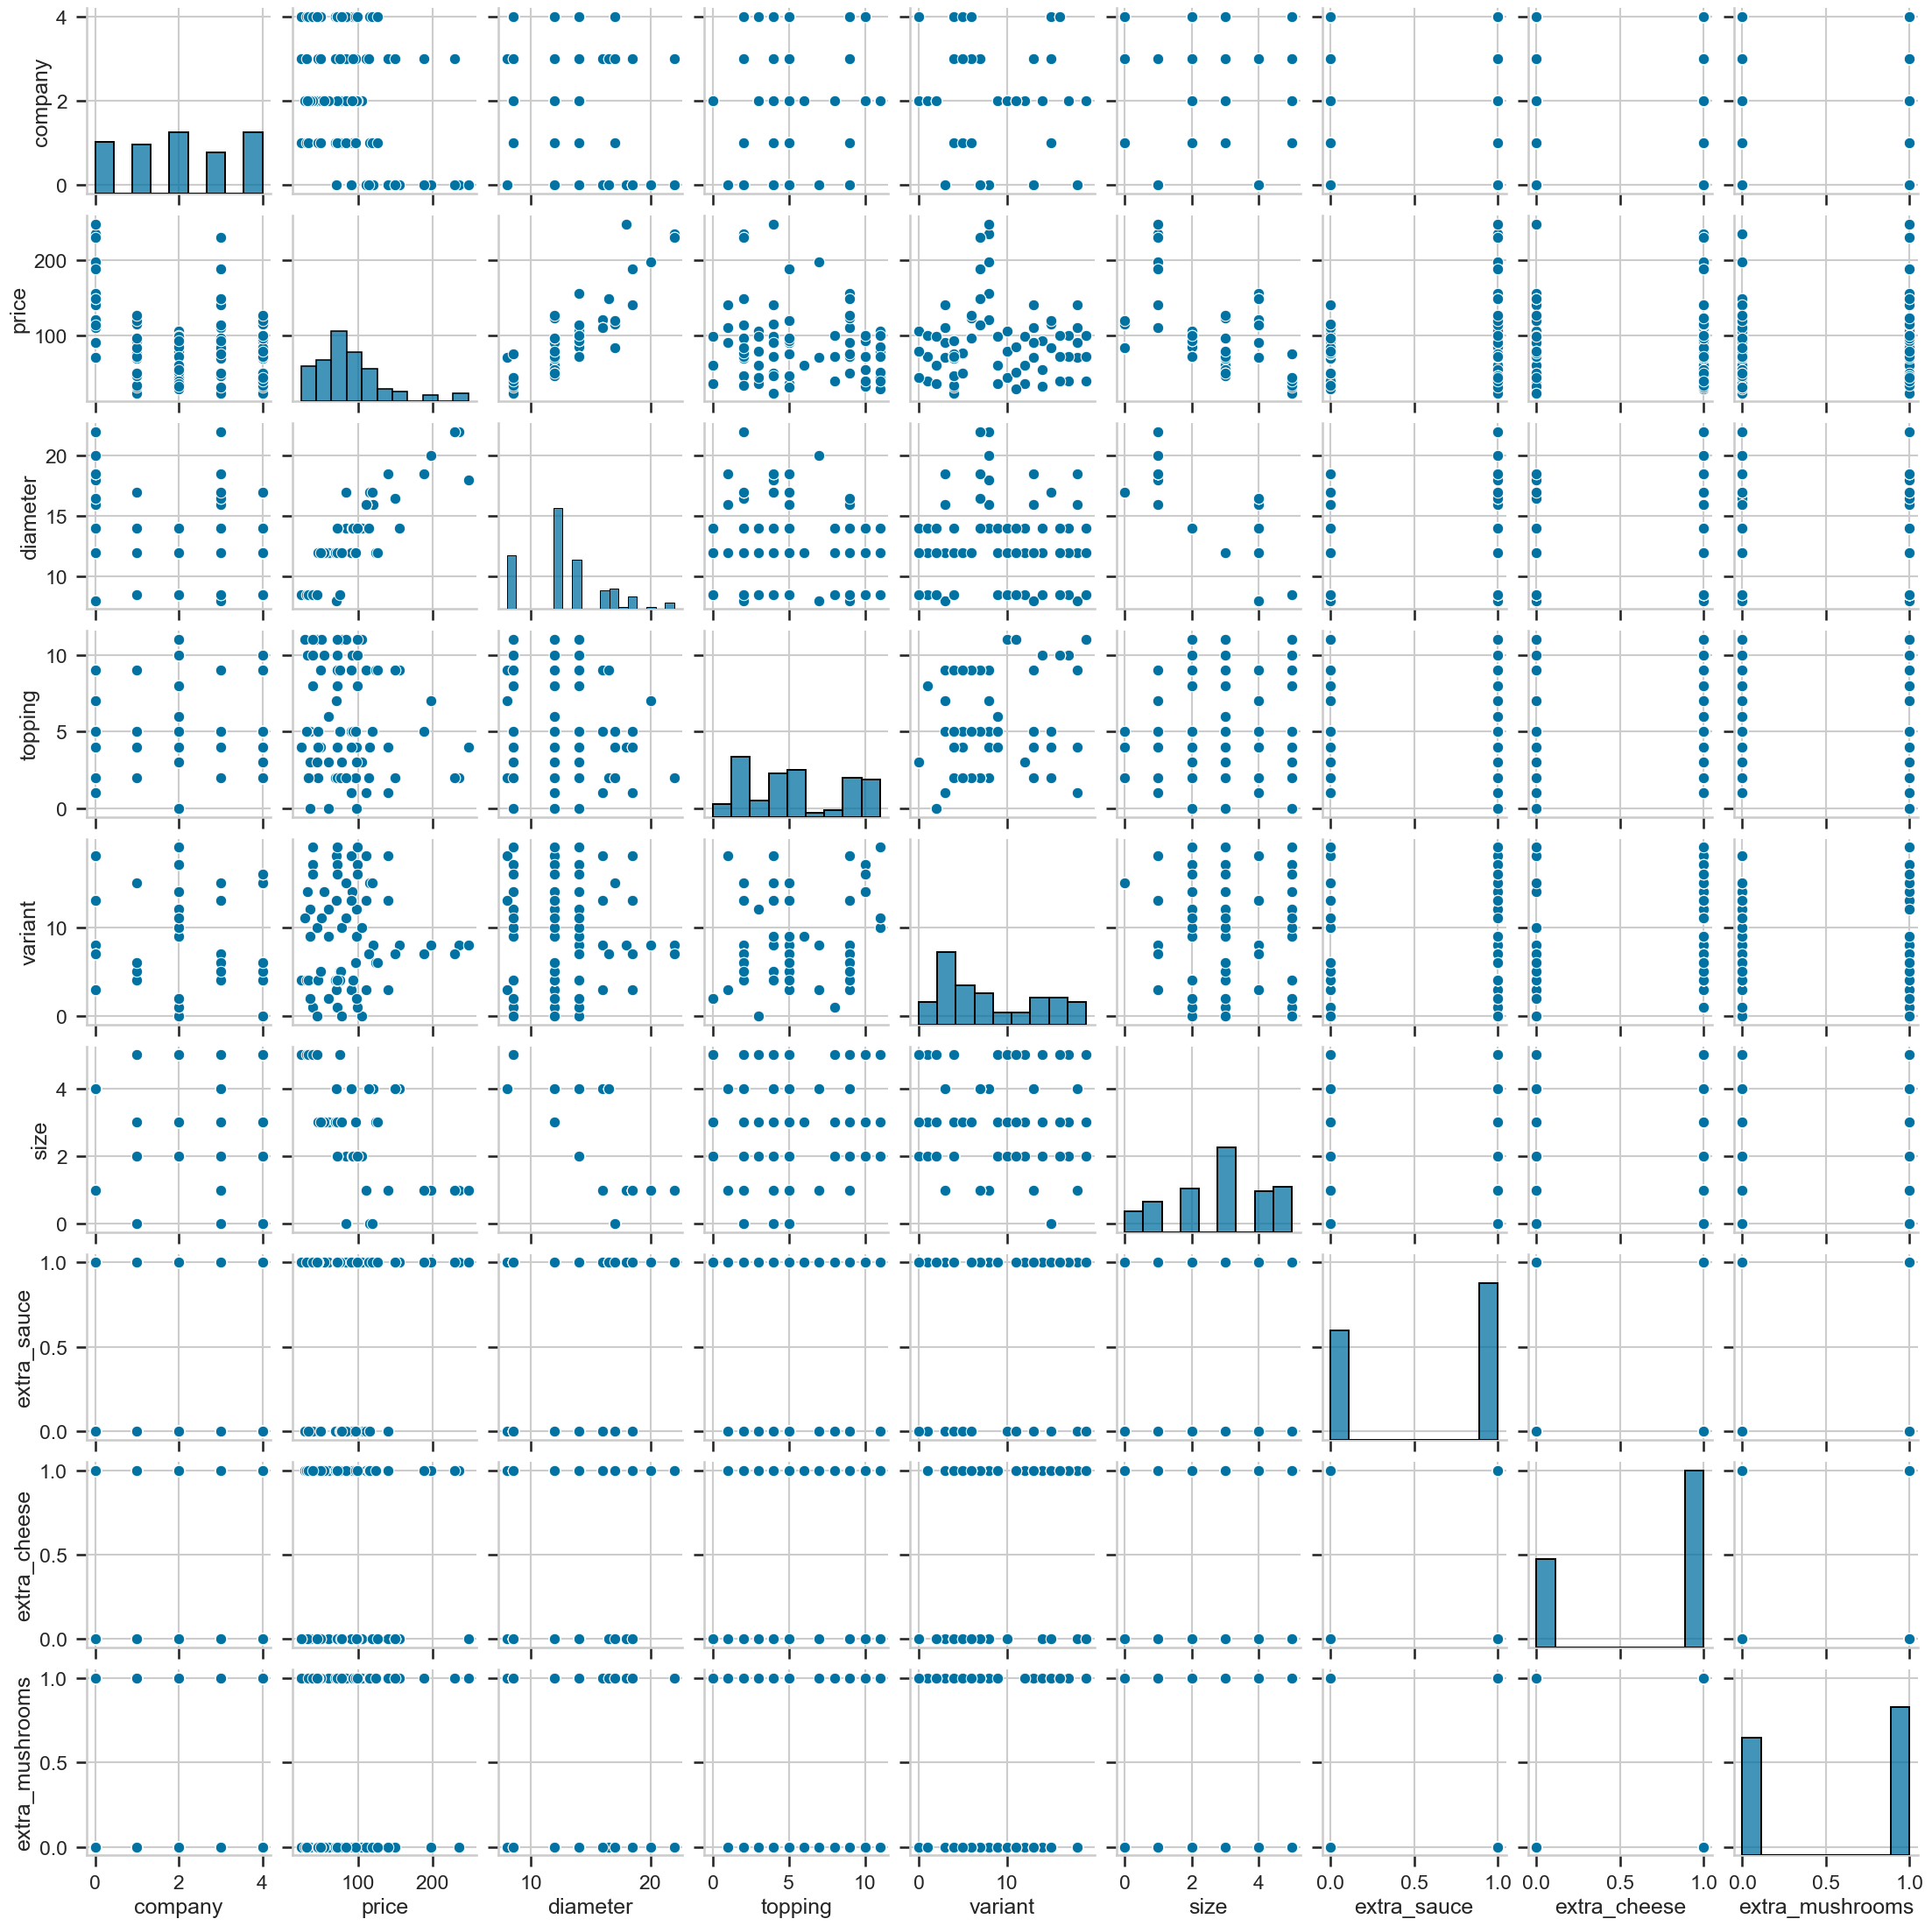

In [32]:
sns.pairplot(pizza_info)
sns.despine()
plt.show()

In [33]:
def build_model(X,y):
    """Used to build linear regression model with stats models and print summary"""
    X = sm.add_constant(X) #Adding the constant
    lm = sm.OLS(y,X).fit() # fitting the model
    print(lm.summary()) # model summary
    return lm

In [34]:
X = pizza_info[['company', 'diameter', 'topping','variant', 'size','extra_sauce','extra_cheese','extra_mushrooms']]
y = pizza_info['price']
X_train, X_test, y_train, y_test = tts(X, y, train_size=0.75, random_state=1)
X_train.to_csv('x_train.csv',index=False)
y_train.to_csv('y_train.csv',index=False)
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), index = X_train.index, columns = X_train.columns )
X_test = pd.DataFrame(scaler.transform(X_test), index = X_test.index, columns = X_test.columns )

In [35]:
#Build Model
def checkVIF(X):
    """Creates dataframe of variance inflation factor results"""
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [36]:
# Train data
pd.options.display.float_format = '{:.5f}'.format #To remove exponential values in the summary statistics
model1 = build_model(X_train,y_train)
model = sm.OLS(y_train, X_train).fit()
print("\nResidual Standard Error: ", model.resid.std(ddof=X.shape[1]))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     54.99
Date:                Thu, 13 Apr 2023   Prob (F-statistic):           8.71e-31
Time:                        20:04:59   Log-Likelihood:                -416.31
No. Observations:                  96   AIC:                             850.6
Df Residuals:                      87   BIC:                             873.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              87.5938      1.983     

In [37]:
# Test data
model1 = build_model(X_test,y_test)
model = sm.OLS(y_test, X_test).fit()
pd.options.display.float_format = '{:.5f}'.format #To remove exponential values in the summary statistics
print("\nResidual Standard Error: ", model.resid.std(ddof=X.shape[1]))

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.687
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     6.570
Date:                Thu, 13 Apr 2023   Prob (F-statistic):           0.000148
Time:                        20:04:59   Log-Likelihood:                -150.66
No. Observations:                  33   AIC:                             319.3
Df Residuals:                      24   BIC:                             332.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              93.5342      5.749     

In [38]:
checkVIF(X_train)

,Features,VIF
4,size,4.19000
1,diameter,4.18000
3,variant,1.29000
2,topping,1.20000
0,company,1.19000
6,extra_cheese,1.12000
5,extra_sauce,1.11000
7,extra_mushrooms,1.03000


In [39]:
# Random Forest Regression
regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(X_train, y_train)
predictions = regressor.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

print('Training Score:',regressor.score(X_train, y_train))
print('Testing Score:',regressor.score(X_test, y_test))

Mean Absolute Error: 11.768181818181816
Mean Squared Error: 290.4503787878787
Root Mean Squared Error: 17.04260481228966
Training Score: 0.9832011930126507
Testing Score: 0.8316363230129337


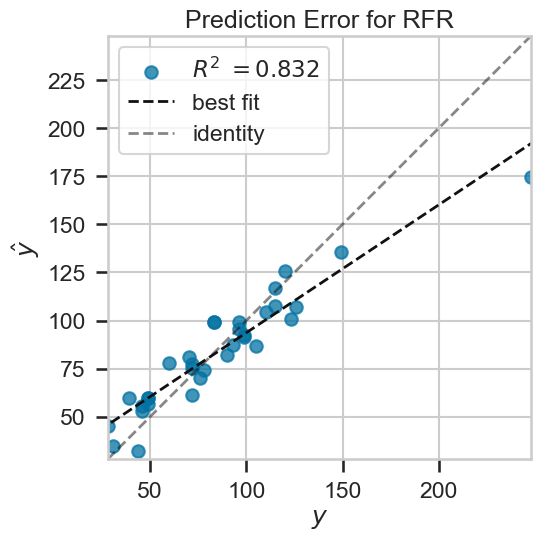

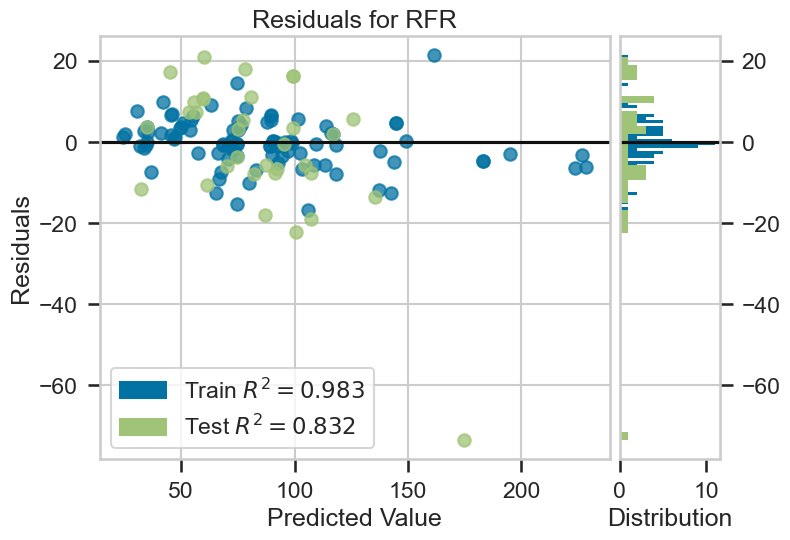

In [40]:
visualizer = prediction_error(regressor, X_train, y_train, X_test, y_test,title = "Prediction Error for RFR")
viz = residuals_plot(regressor, X_train, y_train, X_test, y_test,title = "Residuals for RFR")

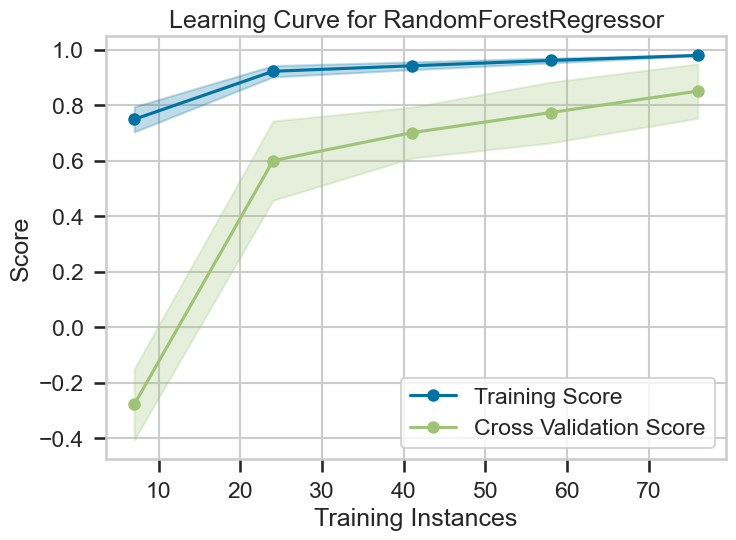

<AxesSubplot:title={'center':'Learning Curve for RandomForestRegressor'}, xlabel='Training Instances', ylabel='Score'>

In [41]:
visualizer = LearningCurve(regressor, scoring='r2')
visualizer.fit(X_train, y_train)       
visualizer.show() 

In [42]:
# Decision Tree Regression
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train, y_train)
predictions = regressor.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

print('Training Score:',regressor.score(X_train, y_train))
print('Testing Score:',regressor.score(X_test, y_test))

Mean Absolute Error: 5.9393939393939394
Mean Squared Error: 200.4848484848485
Root Mean Squared Error: 14.1592672297986
Training Score: 1.0
Testing Score: 0.8837861172294927


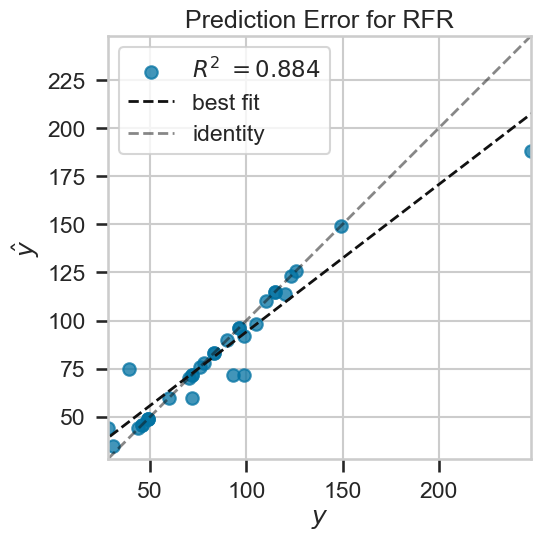

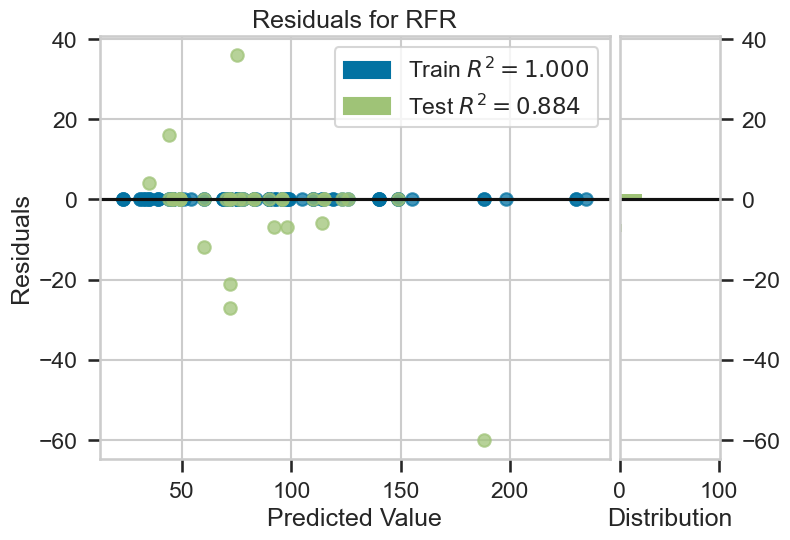

In [43]:
visualizer = prediction_error(regressor, X_train, y_train, X_test, y_test,title = "Prediction Error for RFR")
viz = residuals_plot(regressor, X_train, y_train, X_test, y_test,title = "Residuals for RFR")

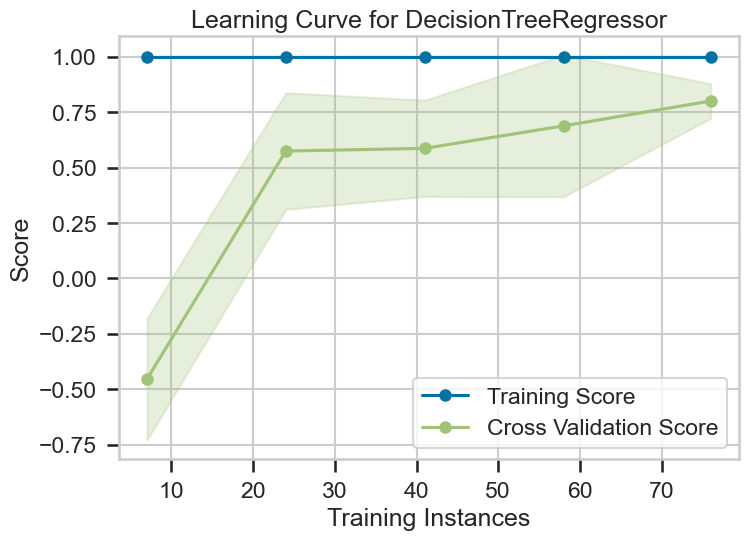

<AxesSubplot:title={'center':'Learning Curve for DecisionTreeRegressor'}, xlabel='Training Instances', ylabel='Score'>

In [44]:
visualizer = LearningCurve(regressor, scoring='r2')
visualizer.fit(X_train, y_train)       
visualizer.show() 

In [45]:
# x = pizza_info['diameter']
# y = pizza_info['price']
x, y = pizza_info.drop(columns = ["price"], axis = 1), pizza_info["price"]
X_train,X_test,y_train,y_test = tts(x,y)

In [46]:
# lr = LinearRegression()
# lr.fit(np.array(X_train).reshape(-1, 1), y_train)

ln = LinearRegression()
ln.fit(X_train, y_train)

LinearRegression()

In [47]:
# plt.scatter(x, y)
# plt.plot(X_train, lr.coef_*X_train + lr.intercept_, '-r')

In [48]:
ln.predict(X_test)

array([ 86.43412098,  38.75784578,  77.10958892,  71.63224348,
        86.43186476,  33.4660416 , 161.65799127,  62.35564432,
        41.44907261,  79.80138738,  63.01795347,  65.84273178,
        35.68760916,  93.55053755,  92.17665601,  36.9431297 ,
        93.24356042,  38.06687629,  66.60528736,  85.52945781,
       106.27181256,  25.07794115, 112.38089324,  20.43379958,
        64.11661552, 110.9864677 ,  68.80473269,  39.405166  ,
        91.36867252, 159.20459635,  95.75186704,  81.87564633,
        38.65318473])

In [49]:
predict_y = ln.predict(X_test) 
predict_y

array([ 86.43412098,  38.75784578,  77.10958892,  71.63224348,
        86.43186476,  33.4660416 , 161.65799127,  62.35564432,
        41.44907261,  79.80138738,  63.01795347,  65.84273178,
        35.68760916,  93.55053755,  92.17665601,  36.9431297 ,
        93.24356042,  38.06687629,  66.60528736,  85.52945781,
       106.27181256,  25.07794115, 112.38089324,  20.43379958,
        64.11661552, 110.9864677 ,  68.80473269,  39.405166  ,
        91.36867252, 159.20459635,  95.75186704,  81.87564633,
        38.65318473])

In [50]:
mse = mean_squared_error(y_test, predict_y)
r2 = r2_score(y_test, predict_y)
print(f"MSE: {mse}", f"R2 Score: {r2}", sep = "\n")

MSE: 467.36734285054797
R2 Score: 0.5062503770190425


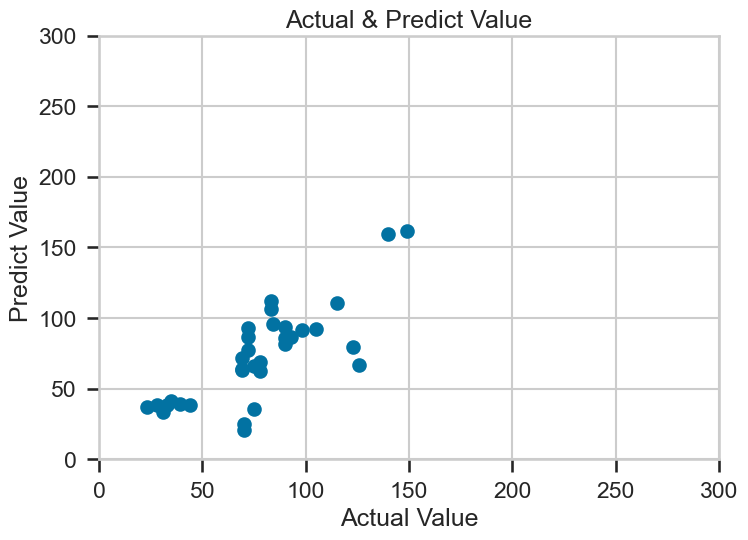

In [51]:
plt.scatter(y_test,predict_y)
plt.title("Actual & Predict Value")
plt.xlabel("Actual Value")
plt.ylabel("Predict Value")
plt.xlim(0, 300)
plt.ylim(0, 300)
plt.grid(True)
plt.show()

In [52]:
output = pd.DataFrame({'Actual price':y_test,'Predict price':predict_y})
output.to_csv('pizza price pred.csv', index =False)
output

,Actual price,Predict price
120,72,86.43412
37,33,38.75785
71,72,77.10959
32,69,71.63224
108,93,86.43186
106,31,33.46604
24,149,161.65799
128,78,62.35564
61,35,41.44907
36,123,79.80139
